# Importing Data Packages

In [ ]:
# heatmaply: Interactive heatmaps for data visualization.
library(heatmaply)

# ggplot2: Elegant and customizable plotting system.
library(ggplot2)

# caTools: Tools for data manipulation and analysis.
library(caTools)

# smotefamily: Implements oversampling techniques for imbalanced datasets.
library(ROSE)

# rpart: Recursive partitioning for decision tree-based modeling.
library(rpart)

# class: Nearest neighbor classification methods.
library(class)

# caret: Unified interface for machine learning modeling and evaluation.
library(caret)

# mice: Multivariate Imputation by Chained Equations.
library(mice)

# reshape2: Reshape and restructure data frames.
library(reshape2)

# smotefamily: Implements oversampling techniques for imbalanced datasets.
library(smotefamily)

# randomForest: Ensemble learning method for classification and regression.
suppressPackageStartupMessages(library(randomForest))


### Data Collection

In [ ]:
cd=read.csv('diabetes - Copy.csv')

In [ ]:
head(cd)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,NA,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


# Exploratory Data Analysis

1. Pregnancies: Number of times pregnant.
2. Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: Provides information about diabetes history in relatives and the genetic relationship of those relatives to the patient.
8. Age: Age of the individual in years.
9. Outcome: Indicating whether the individual has diabetes (1) or not (0).

In [ ]:
colnames(cd)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [ ]:
str(cd)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 NA 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


There are only two data types are present.

### Handling missing values

In [ ]:
colSums(is.na(cd))

Pregnancies                  Glucose            BloodPressure 
                       0                        3                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        3                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       1                        0                        0

In [ ]:
mean_value <- mean(cd$Glucose, na.rm = TRUE)
cd$Glucose[is.na(cd$Glucose)] <- mean_value

In [ ]:
mean_value <- mean(cd$Insulin, na.rm = TRUE)
cd$Insulin[is.na(cd$Insulin)] <- mean_value

Rows with null values  (complete.cases helps to give data without null values)

In [ ]:
cd[!complete.cases(cd),]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
17,0,118,84,47,230,45.8,NA,31,1


Removing missing values in remaining columns

In [ ]:
cd <- na.omit(cd)

In [ ]:
colSums(is.na(cd))

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [ ]:
summary(cd)

  Pregnancies       Glucose      BloodPressure    SkinThickness 
 Min.   : 0.00   Min.   :  0.0   Min.   :  0.00   Min.   : 0.0  
 1st Qu.: 1.00   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.0  
 Median : 3.00   Median :117.0   Median : 72.00   Median :23.0  
 Mean   : 3.85   Mean   :120.9   Mean   : 69.09   Mean   :20.5  
 3rd Qu.: 6.00   3rd Qu.:140.5   3rd Qu.: 80.00   3rd Qu.:32.0  
 Max.   :17.00   Max.   :199.0   Max.   :122.00   Max.   :99.0  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:27.30   1st Qu.:0.2435           1st Qu.:24.00  
 Median : 29.00   Median :32.00   Median :0.3710           Median :29.00  
 Mean   : 79.32   Mean   :31.97   Mean   :0.4718           Mean   :33.24  
 3rd Qu.:126.00   3rd Qu.:36.55   3rd Qu.:0.6265           3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome      
 M

### Handling Outliers

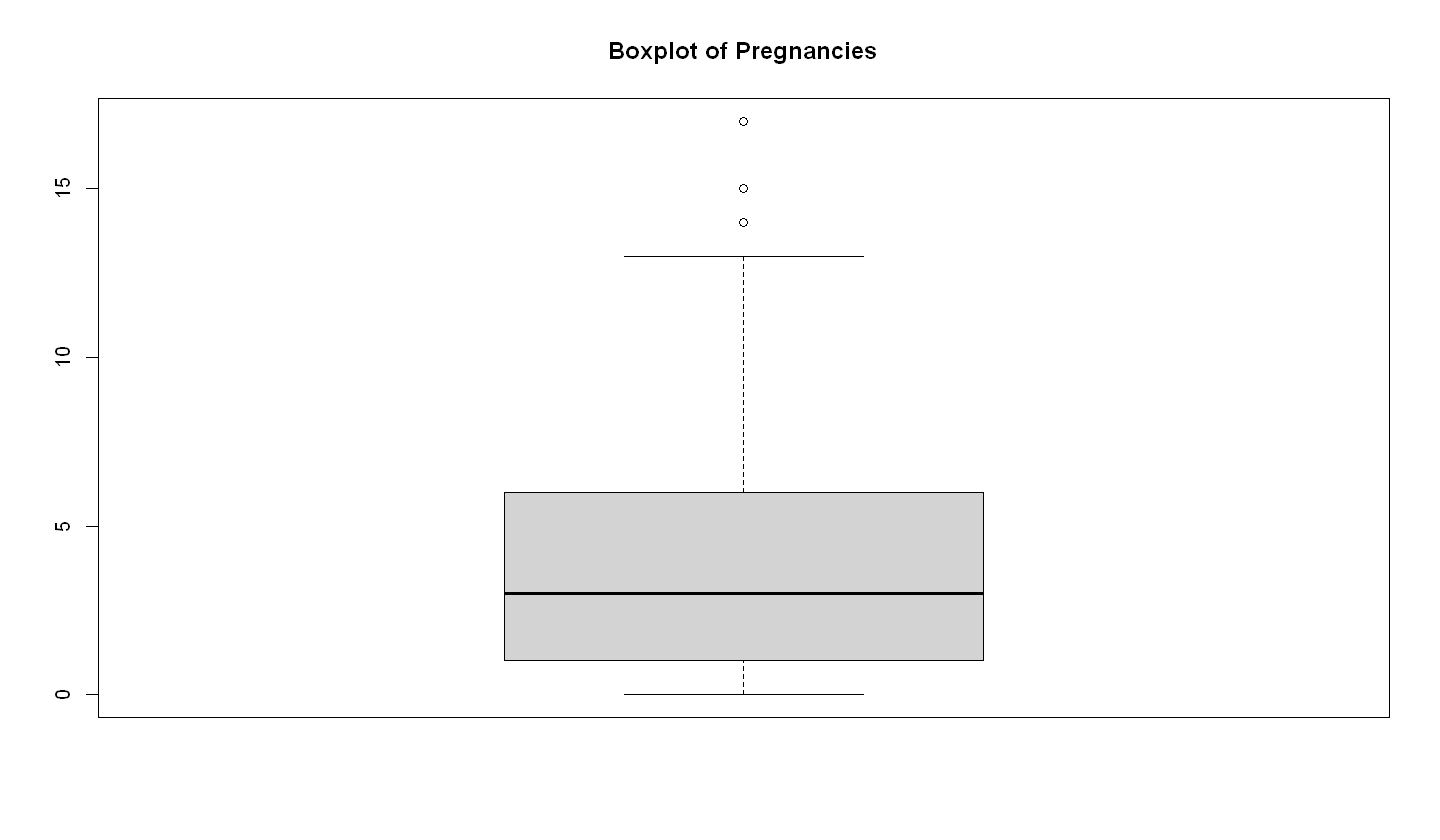

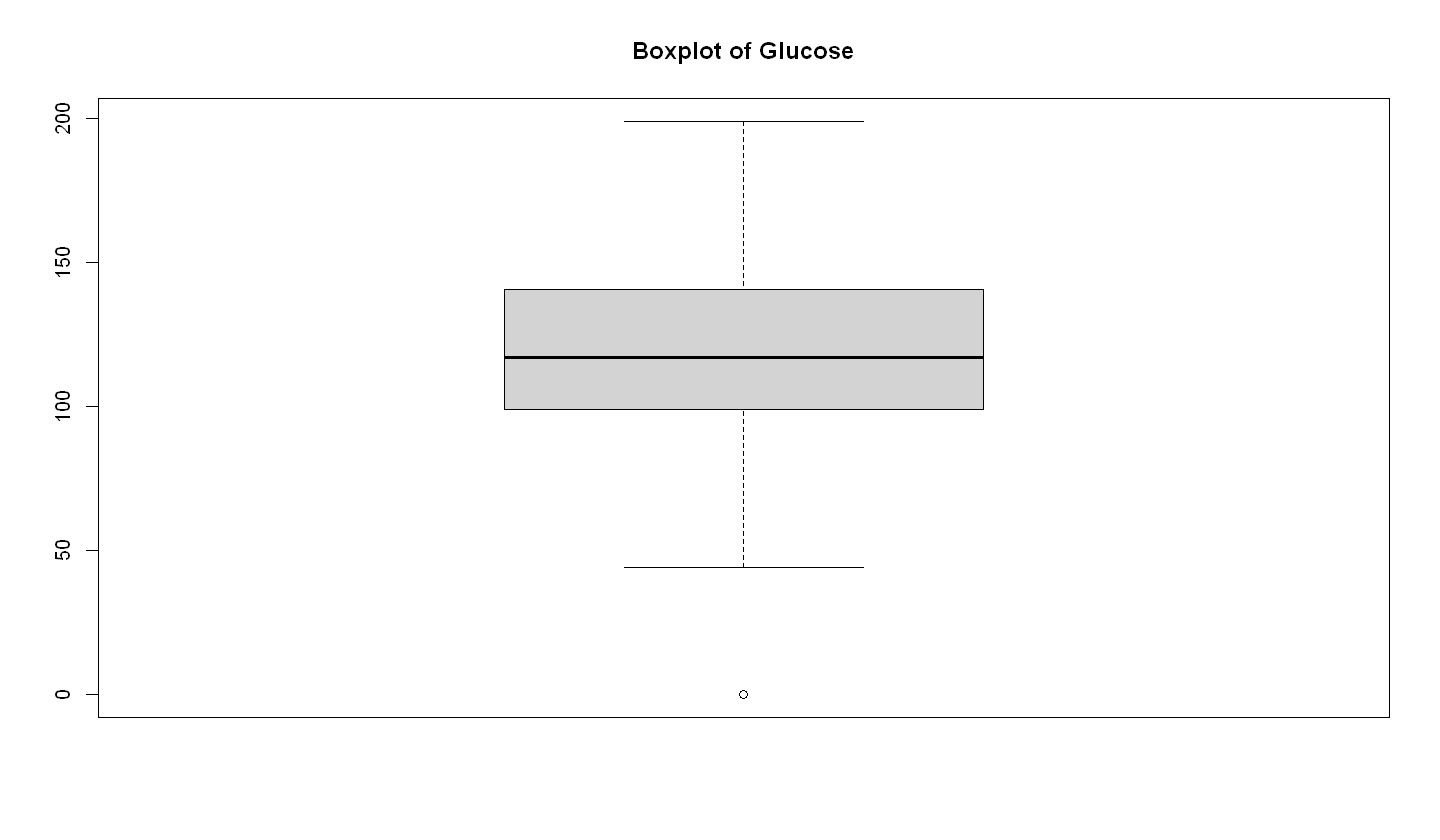

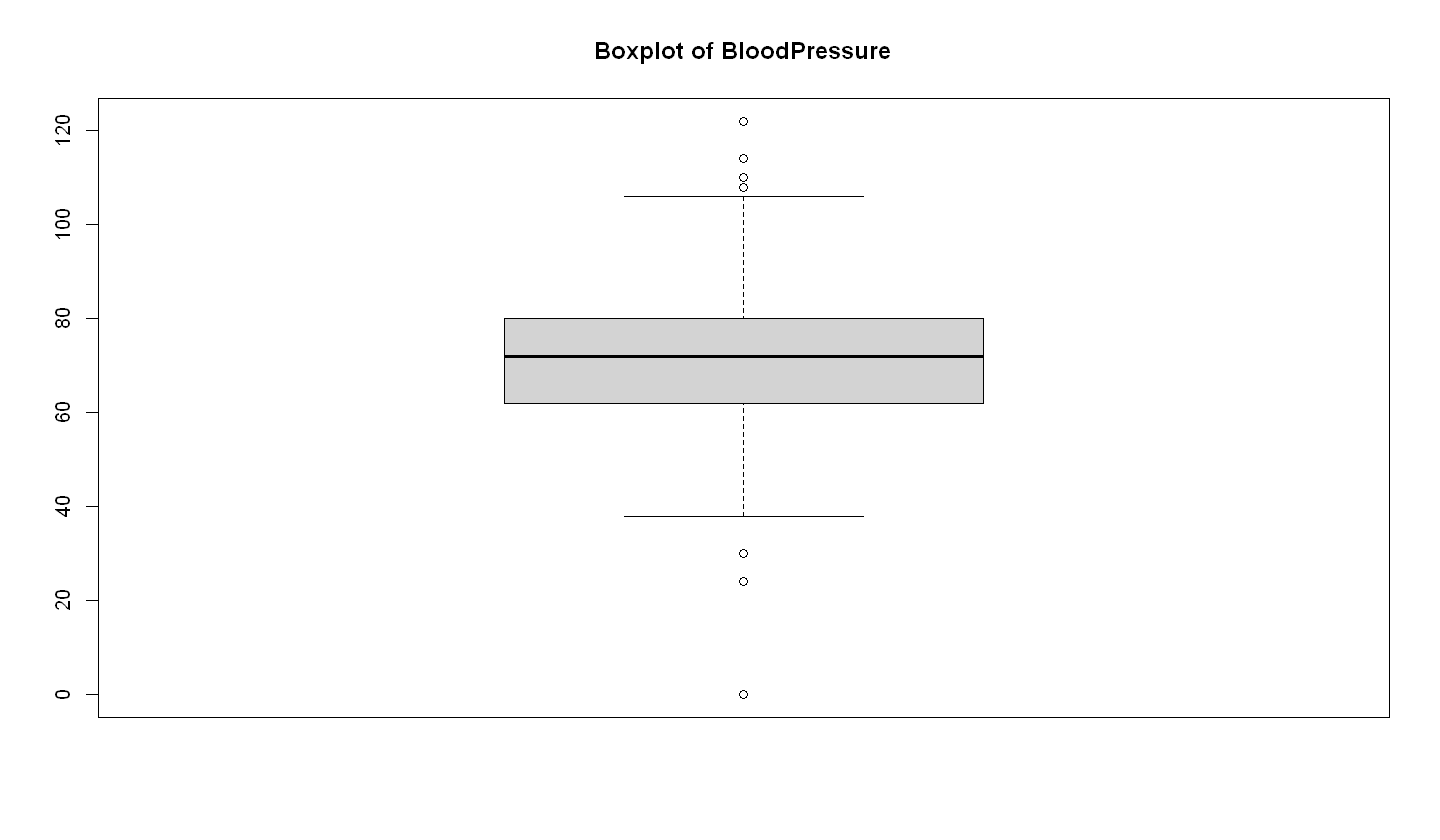

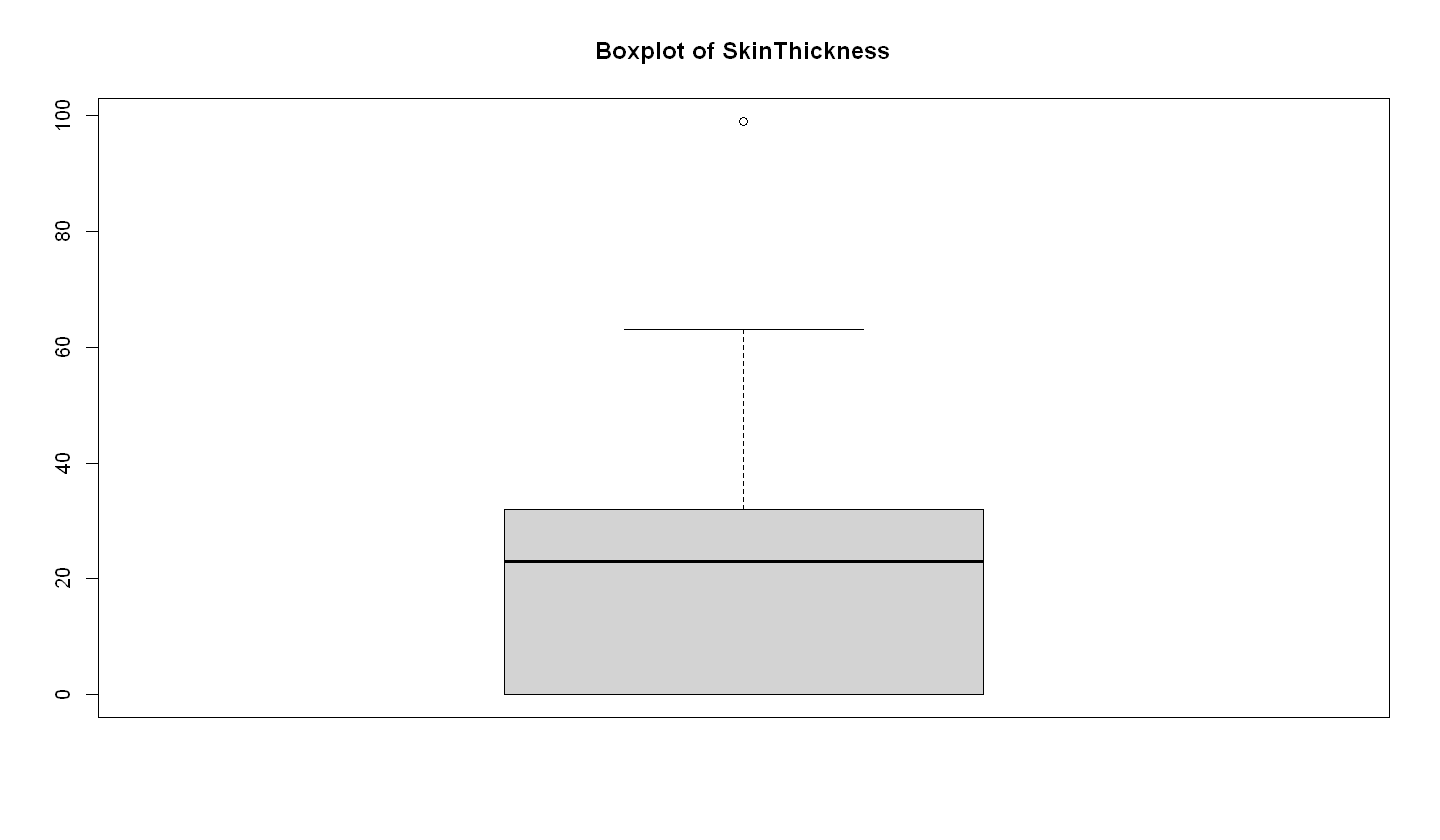

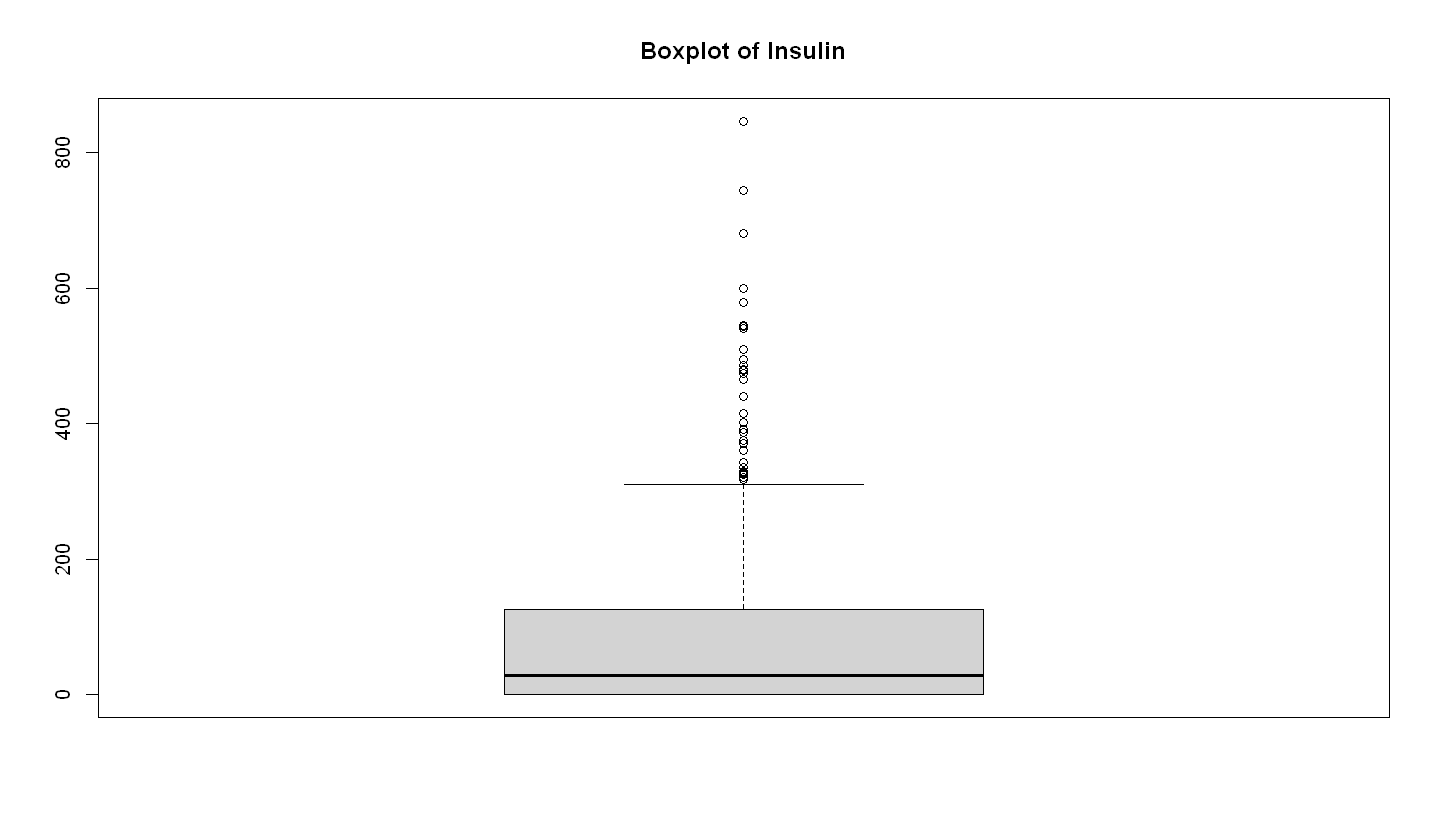

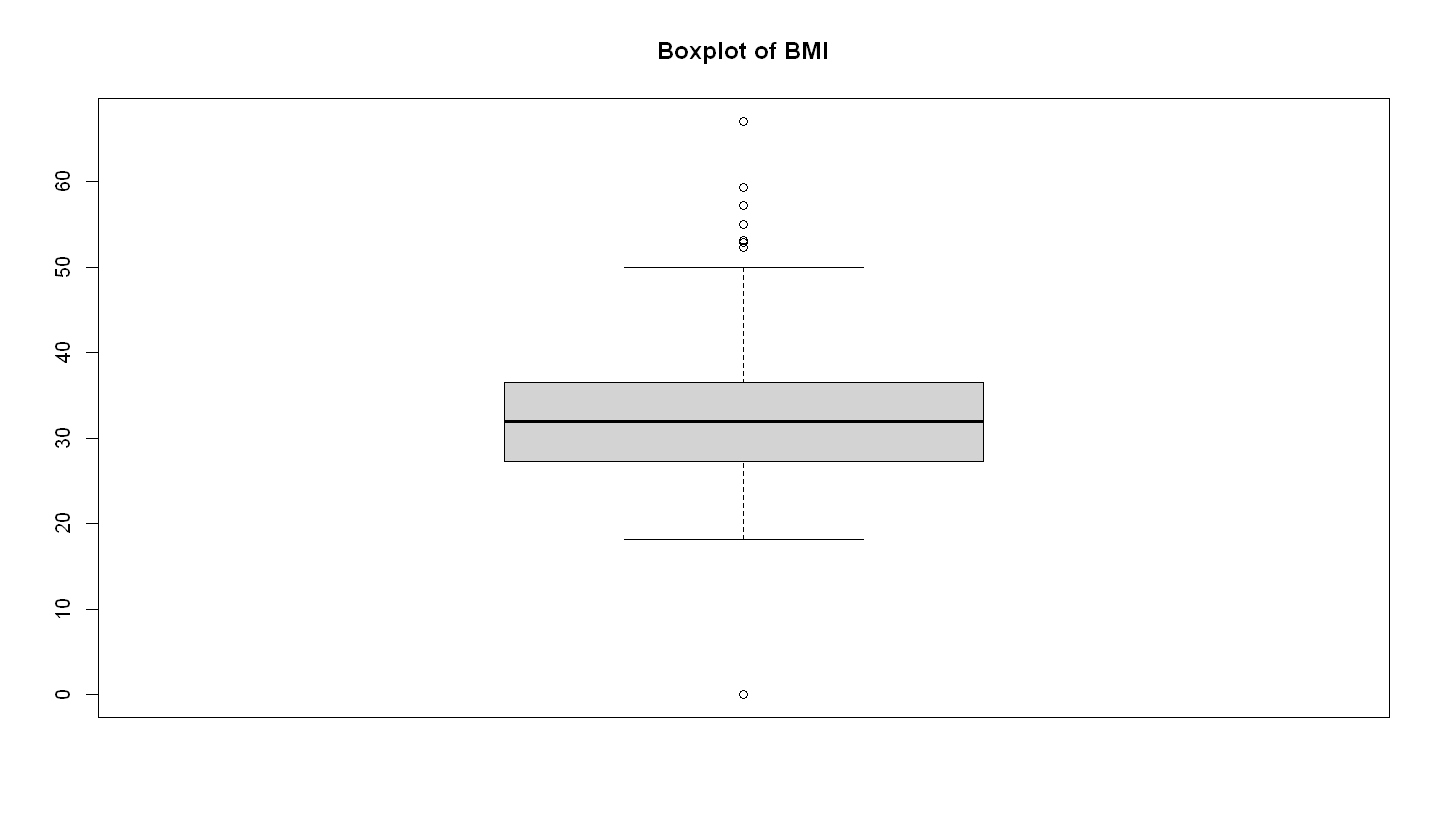

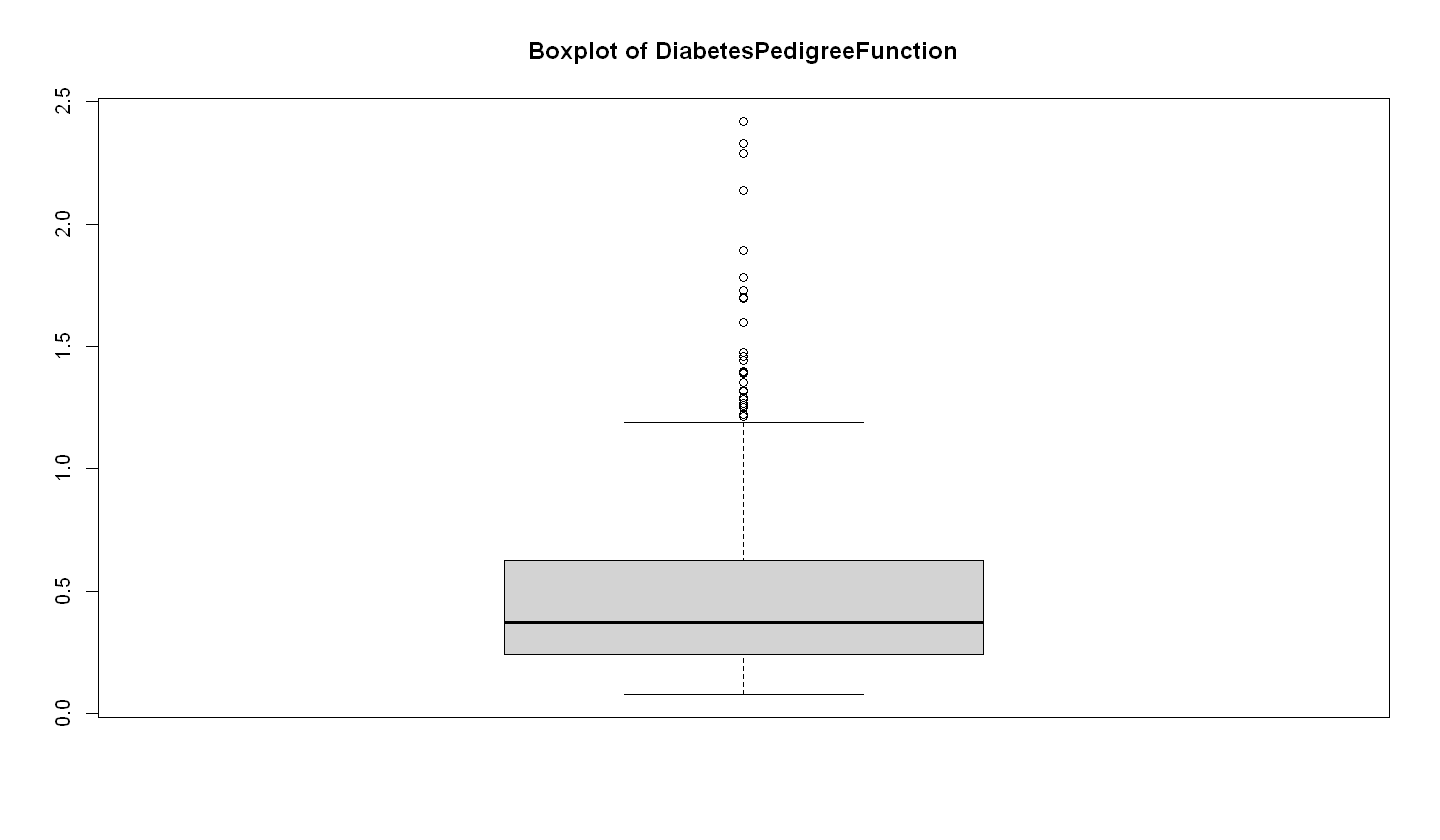

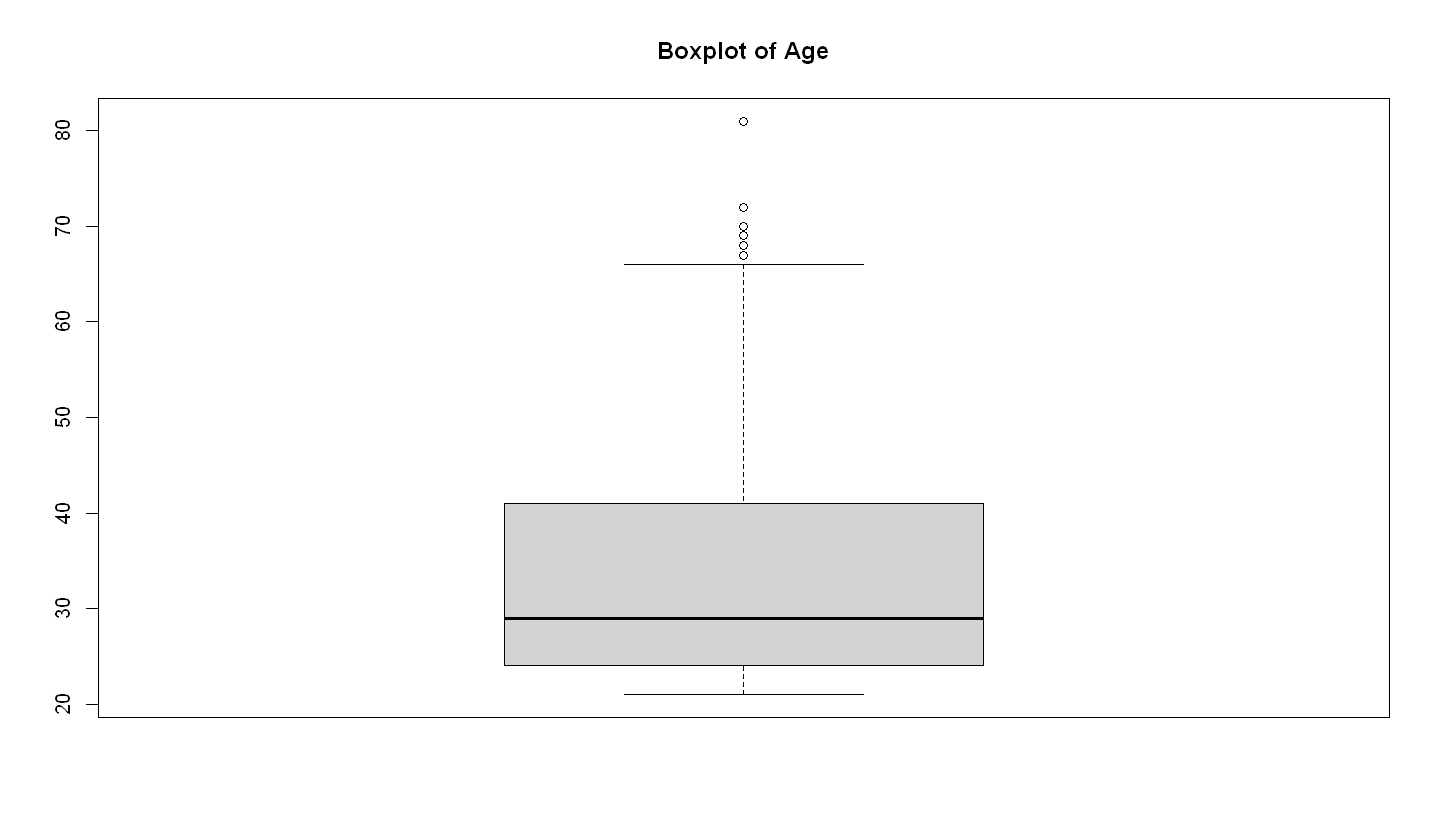

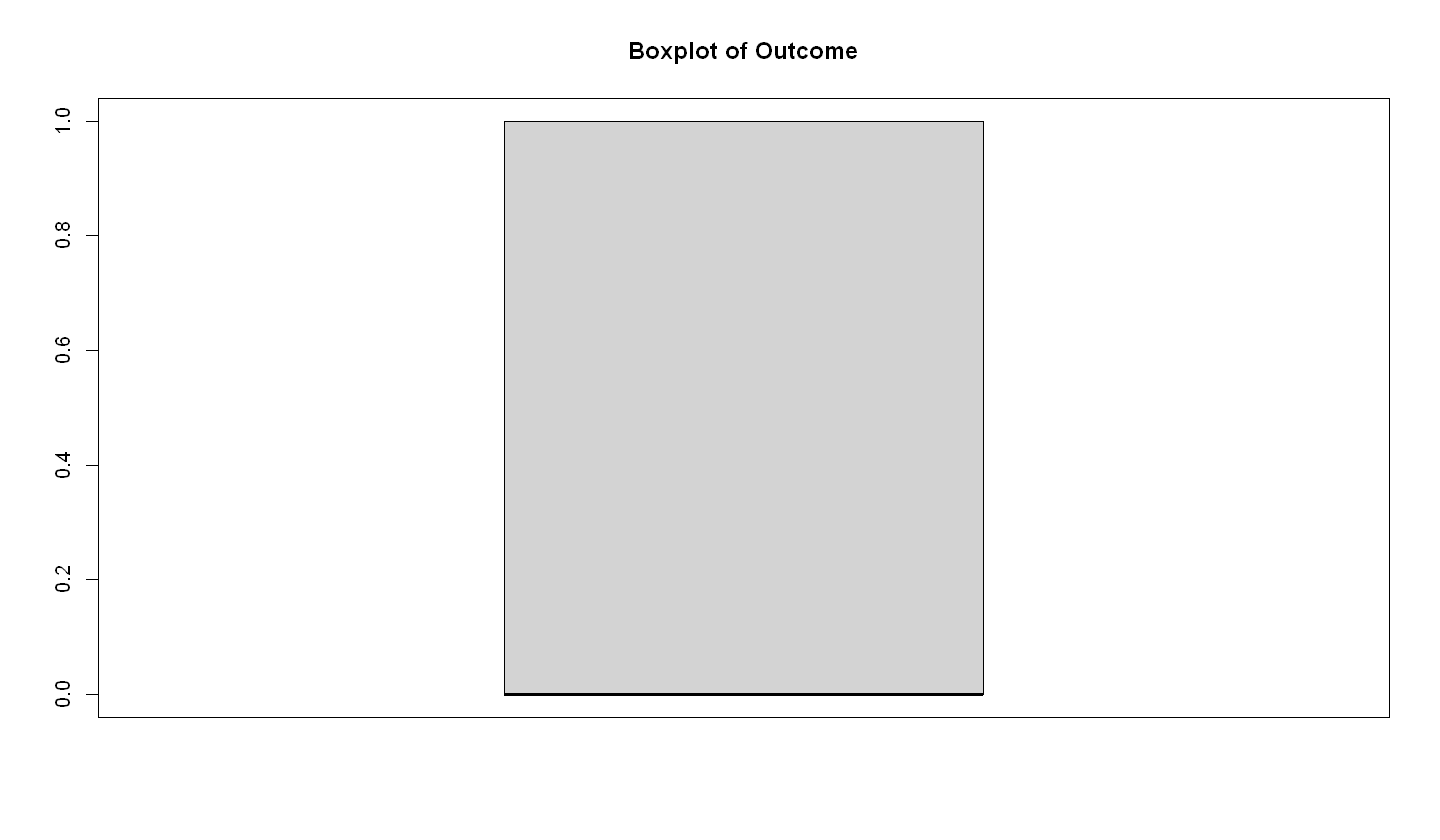

In [ ]:
for (col in colnames(cd)) {
  boxplot(cd[[col]], main = paste('Boxplot of', col))
}

In [ ]:
# Calculate quartiles and IQR for 'Glucose' column
Q1 <- quantile(cd$Glucose, 0.25)
Q3 <- quantile(cd$Glucose, 0.75)
IQR <- Q3 - Q1

# Calculate lower and upper bounds
Lower_Bound_G <- Q1 - 1.5 * IQR
Upper_Bound_G <- Q3 + 1.5 * IQR

# Replace outliers with lower bound value
cd$Glucose[cd$Glucose < Lower_Bound_G] <- Lower_Bound_G


In [ ]:
# Calculate quartiles and IQR for 'BMI' column
Q1 <- quantile(cd$BMI, 0.25)
Q3 <- quantile(cd$BMI, 0.75)
IQR <- Q3 - Q1

# Calculate lower and upper bounds
Lower_Bound_B <- Q1 - 1.5 * IQR
Upper_Bound_B <- Q3 + 1.5 * IQR

# Replace outliers with lower bound value
cd$BMI[cd$BMI < Lower_Bound_B] <- Lower_Bound_B

# Replace outliers with upper bound value
cd$BMI[cd$BMI > Upper_Bound_B] <- Upper_Bound_B


In [ ]:
# Calculate quartiles and IQR for 'Age' column
Q1 <- quantile(cd$Age, 0.25)
Q3 <- quantile(cd$Age, 0.75)
IQR <- Q3 - Q1

# Calculate lower and upper bounds
Lower_Bound_A <- Q1 - 1.5 * IQR
Upper_Bound_A <- Q3 + 1.5 * IQR

# Replace outliers with upper bound value
cd$Age[cd$Age > Upper_Bound_A] <- Upper_Bound_A


In [ ]:
# Calculate quartiles and IQR for 'Age' column
Q1 <- quantile(cd$SkinThickness, 0.25)
Q3 <- quantile(cd$SkinThickness, 0.75)
IQR <- Q3 - Q1

# Calculate lower and upper bounds
Lower_Bound_A <- Q1 - 1.5 * IQR
Upper_Bound_A <- Q3 + 1.5 * IQR

# Replace outliers with upper bound value
cd$SkinThickness[cd$SkinThickness > Upper_Bound_A] <- Upper_Bound_A


### Convert all columns to numeric 

In [ ]:
cd[, ] <- apply(cd[, ], 2, as.numeric)

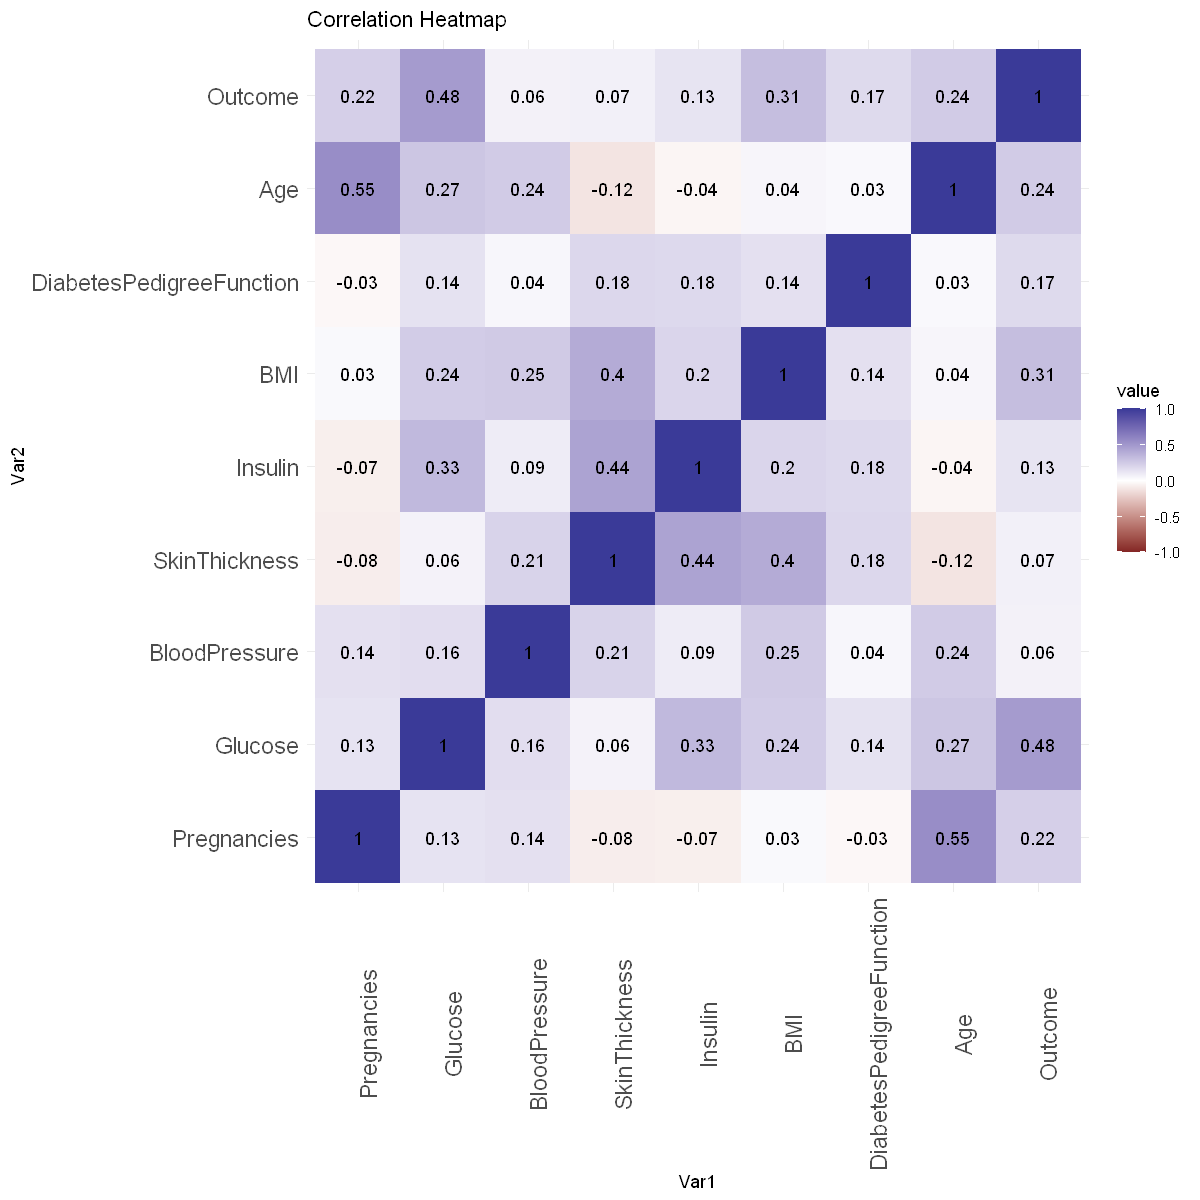

In [ ]:
# Set plot size options
options(repr.plot.width = 10, repr.plot.height = 10)

correlation_df <- melt(cor(cd))

ggplot(data = correlation_df, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 2)), color = "black")+
  scale_fill_gradient2( limit = c(-1, 1), space = "Lab") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, size = 14),
        axis.text.y = element_text(size = 14)) +
  labs(title = "Correlation Heatmap")


## Data Visualization

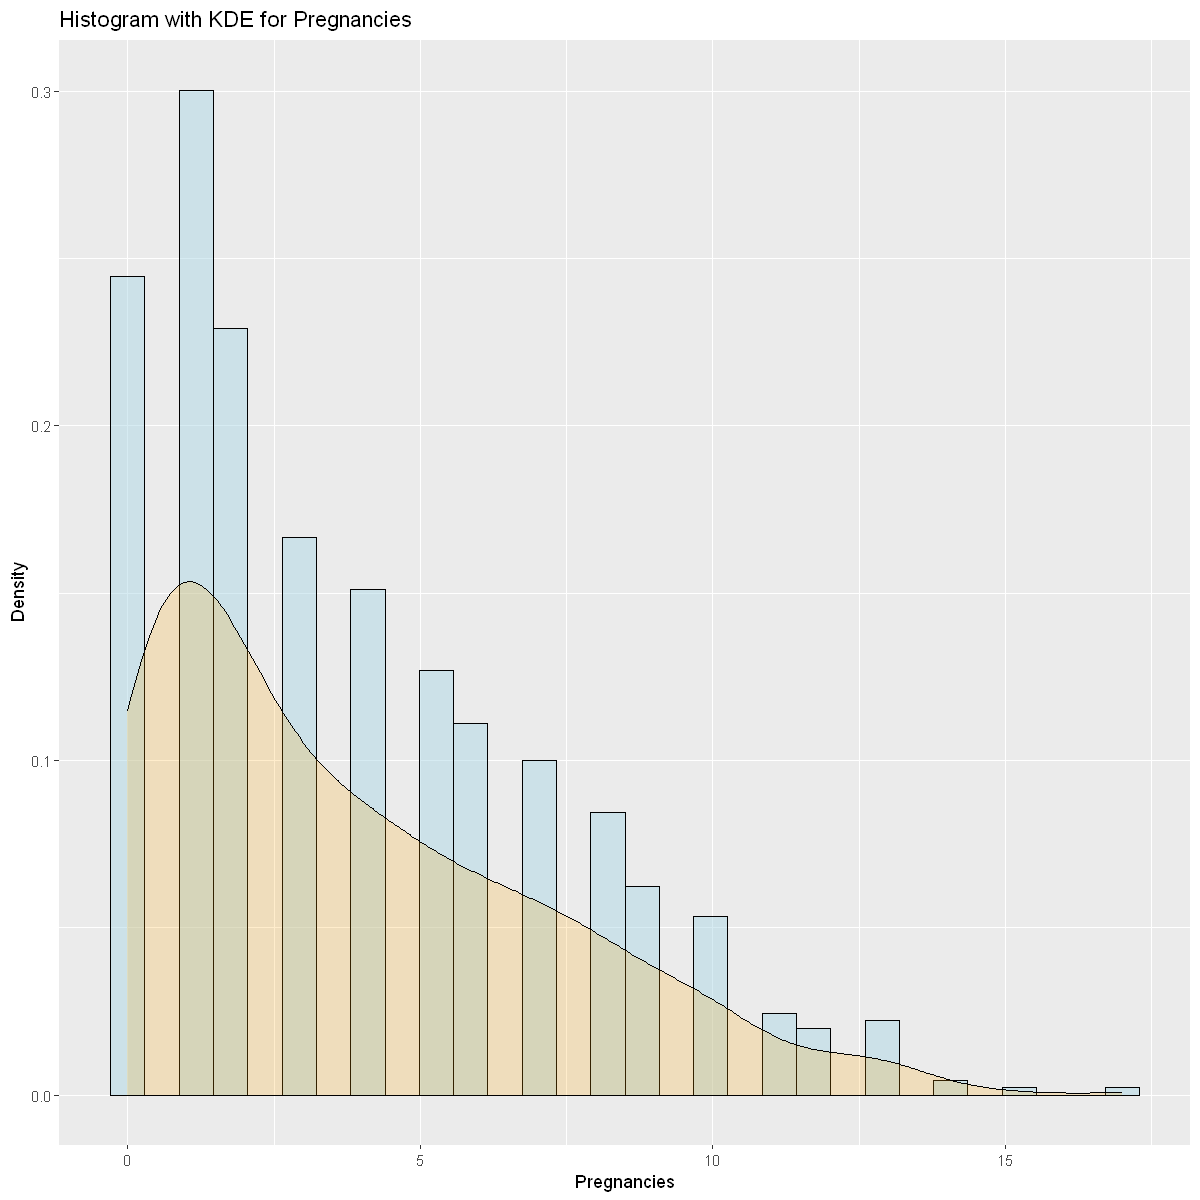

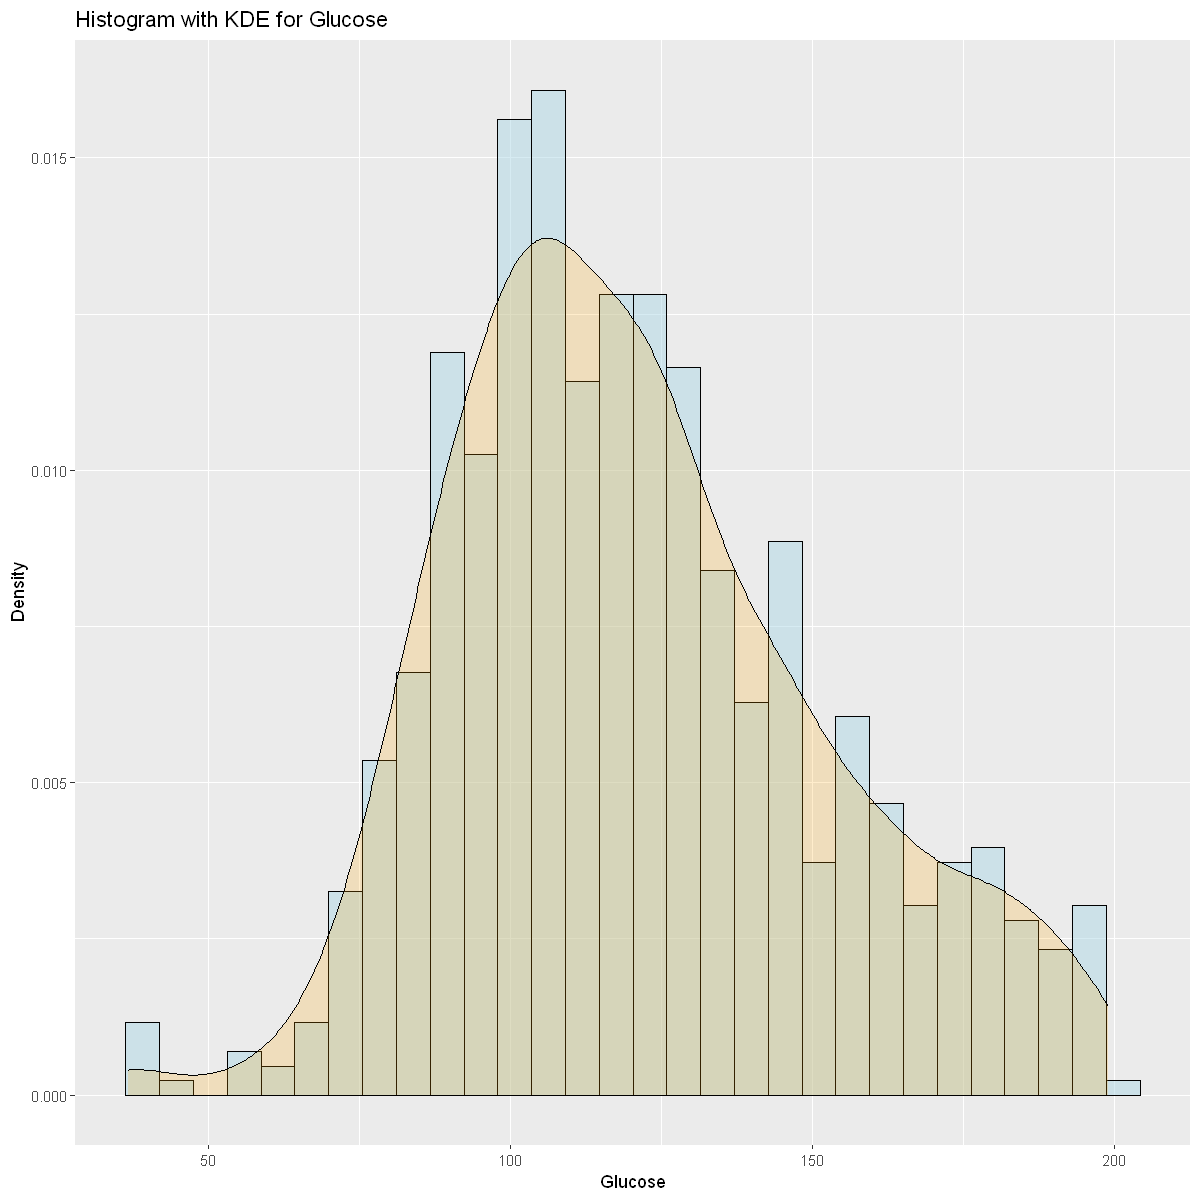

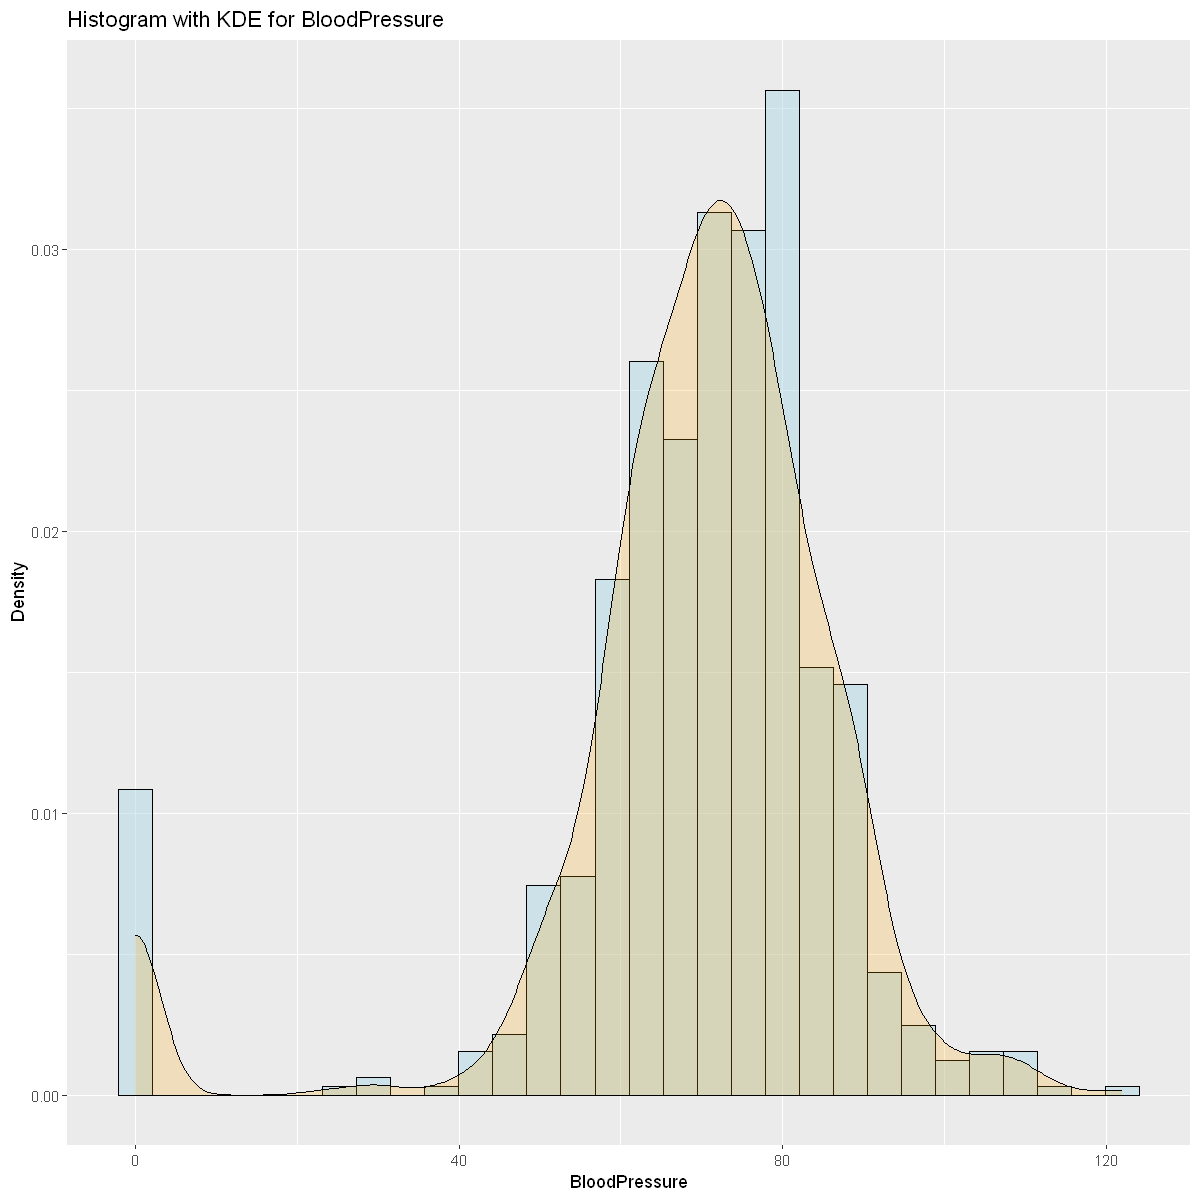

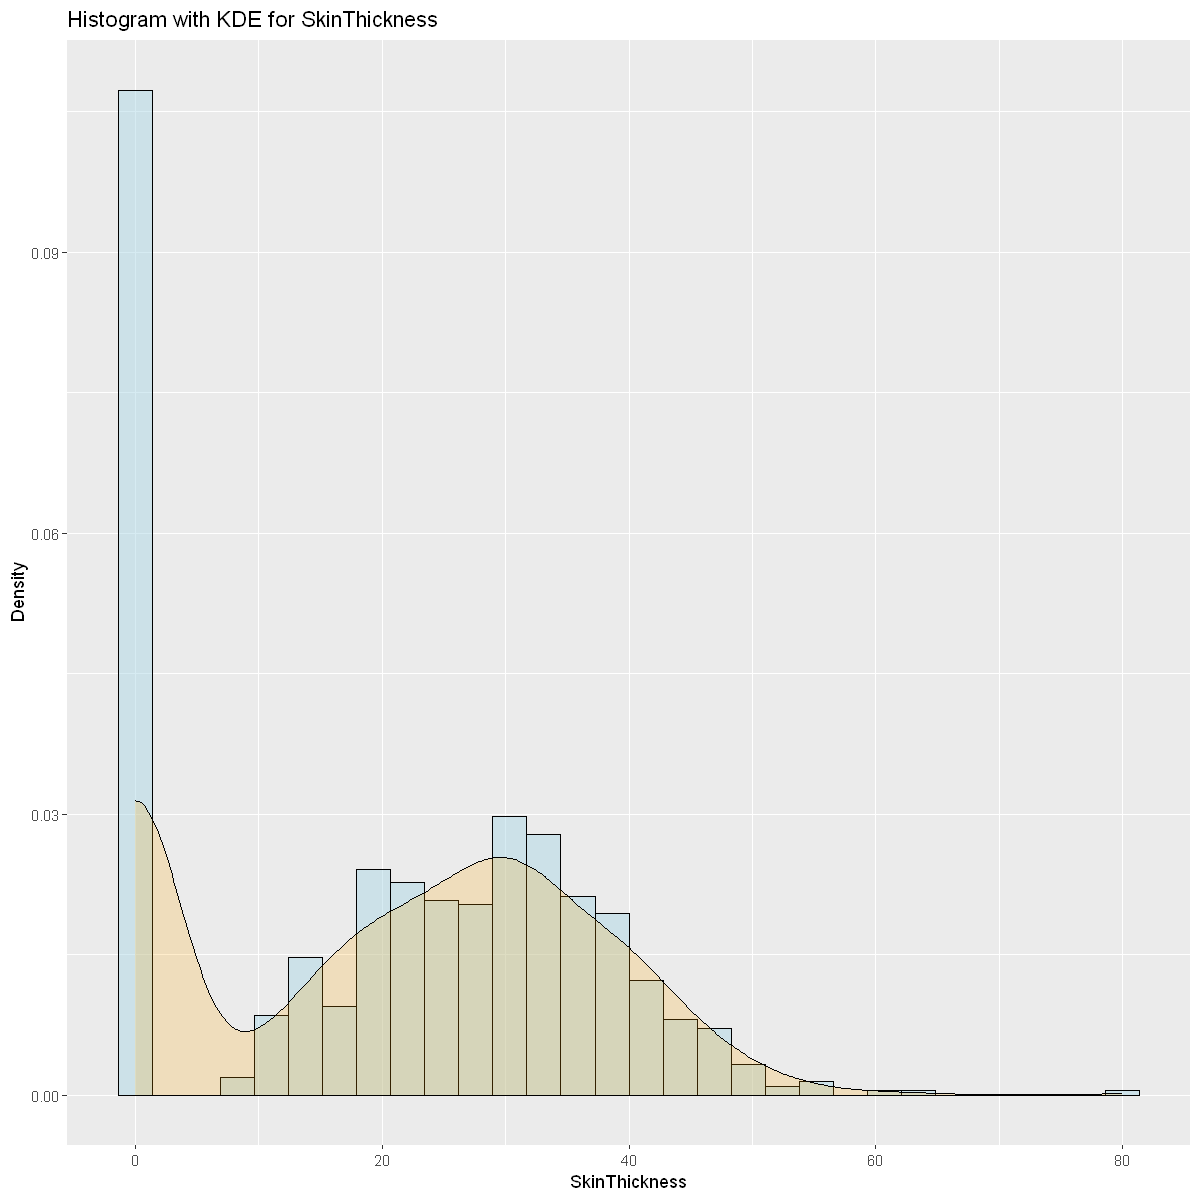

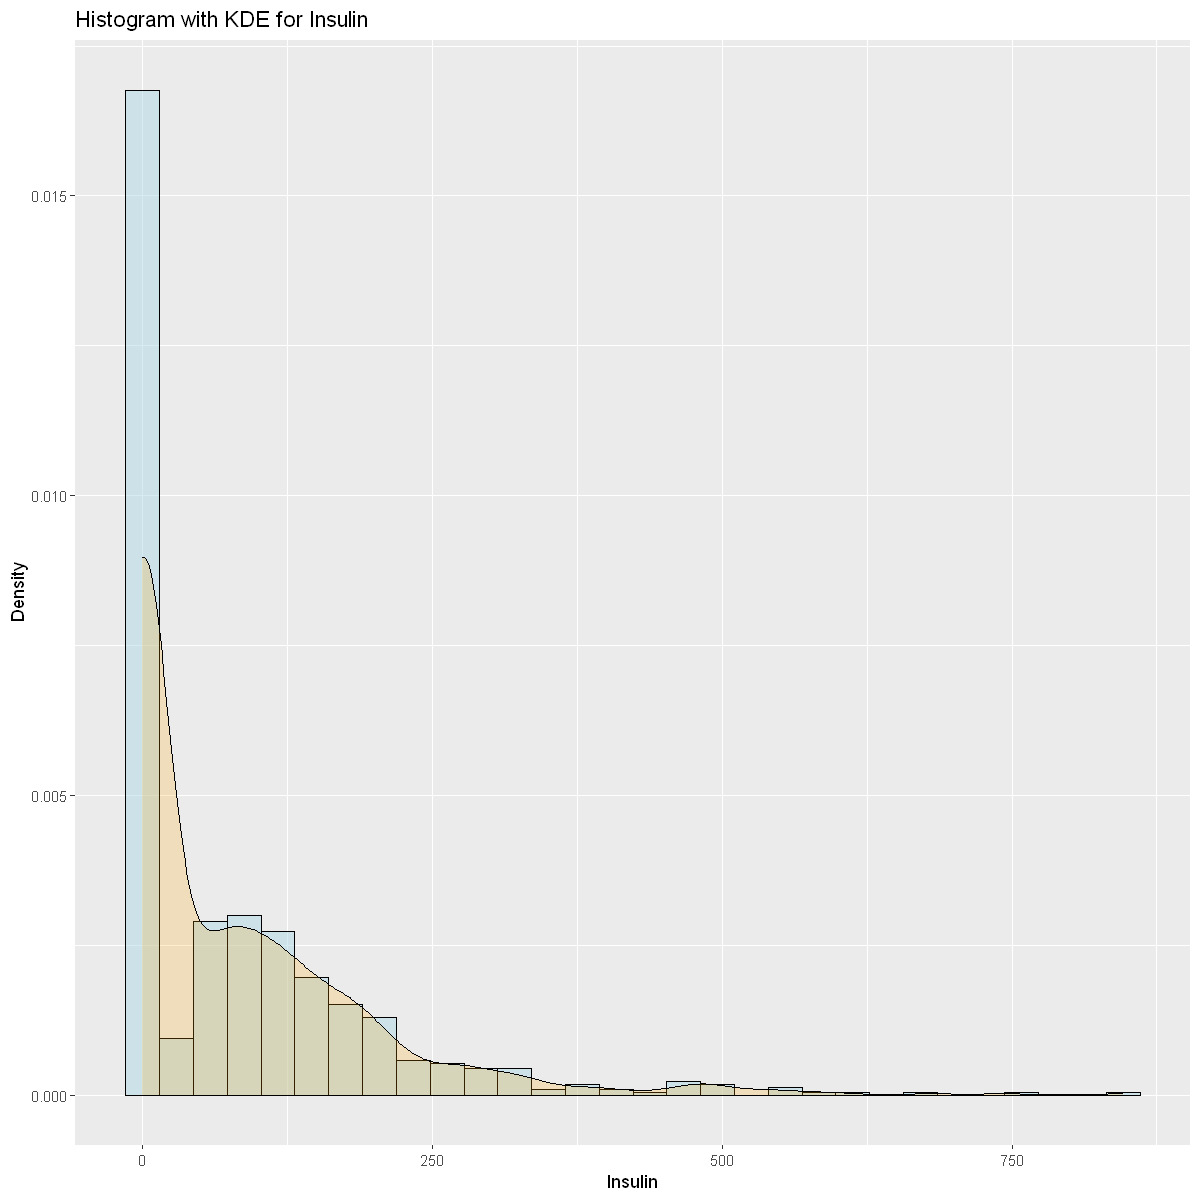

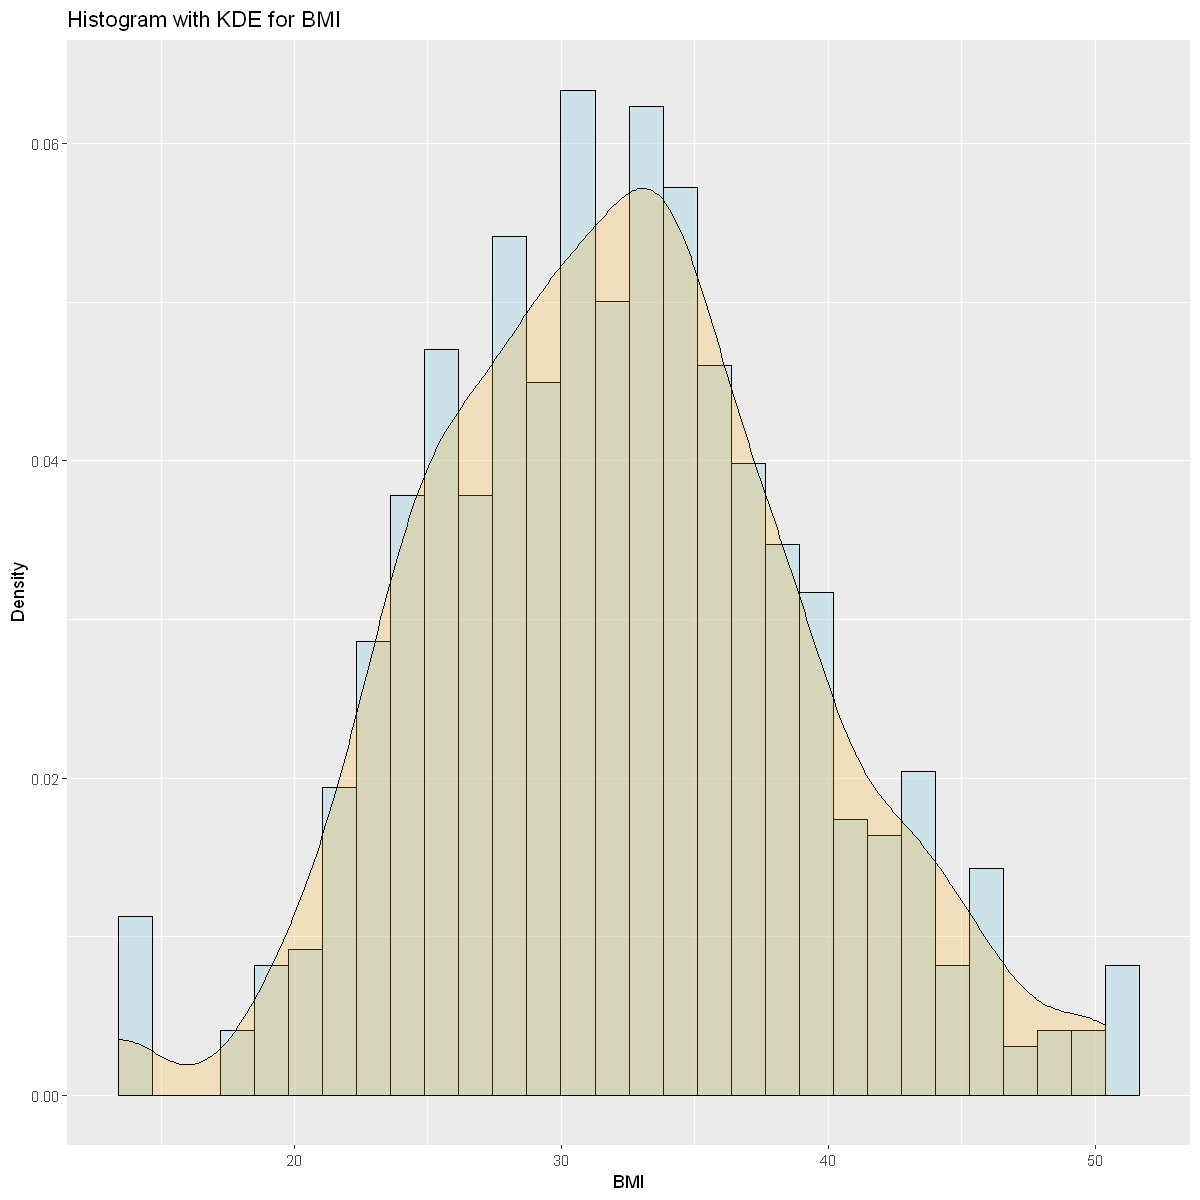

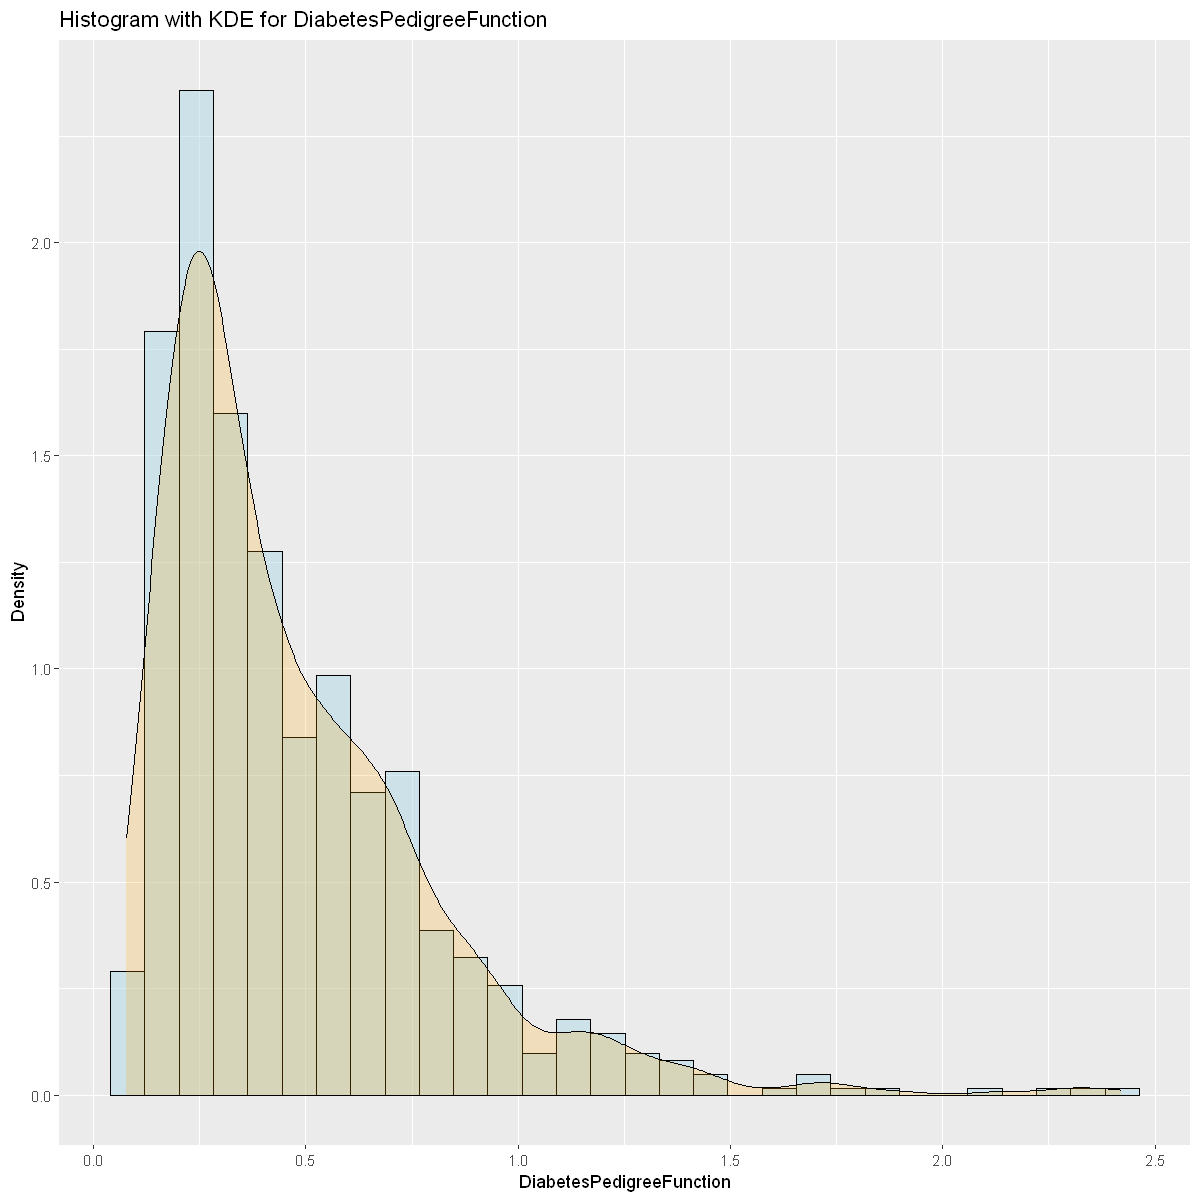

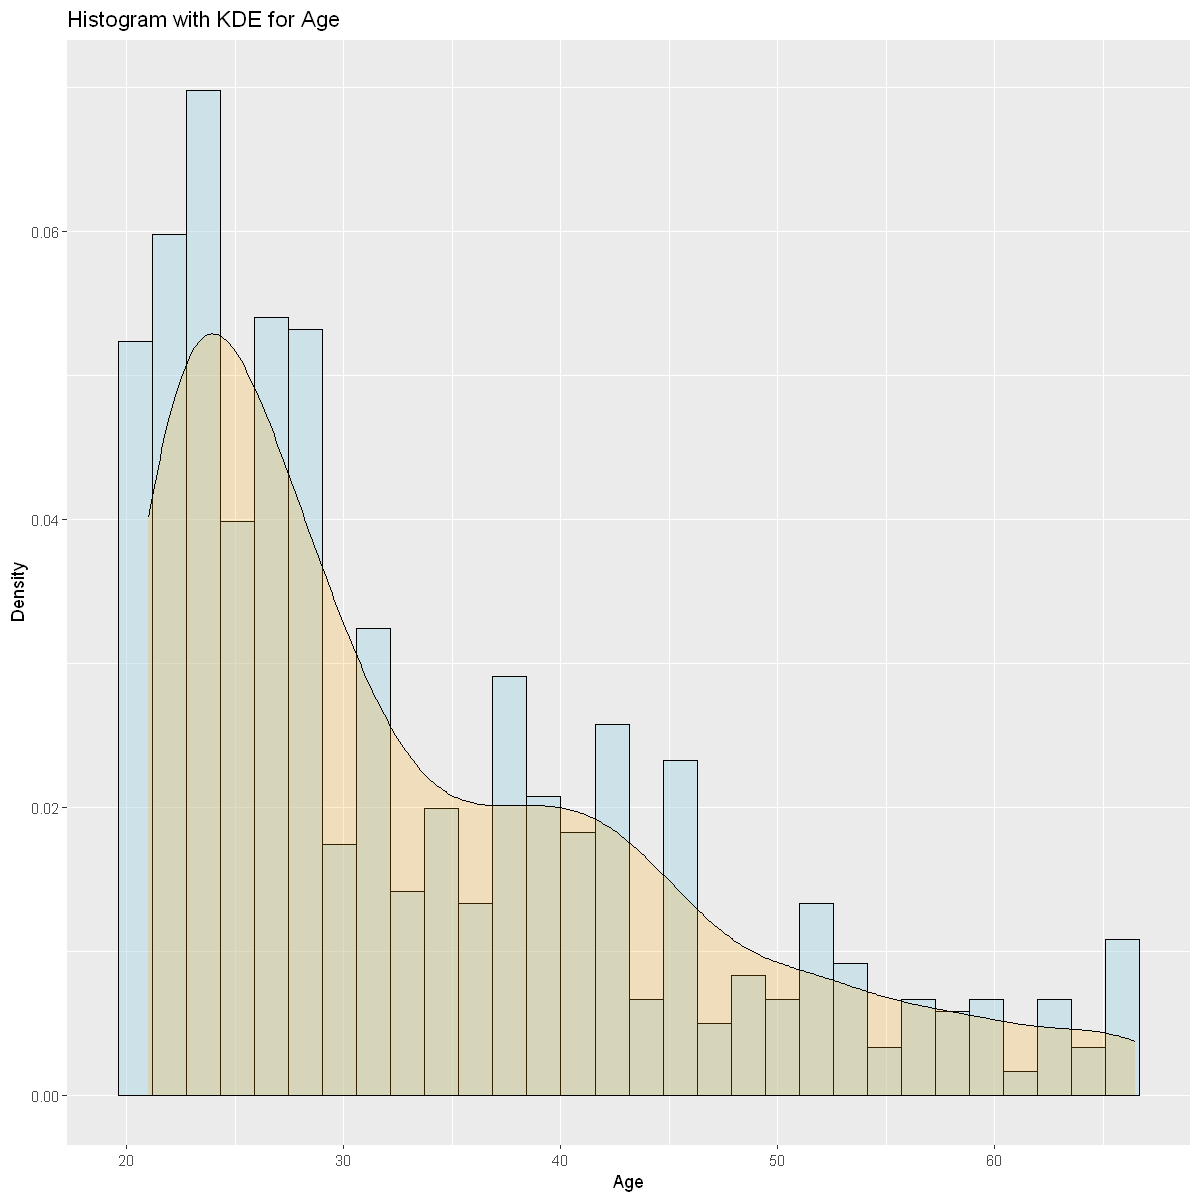

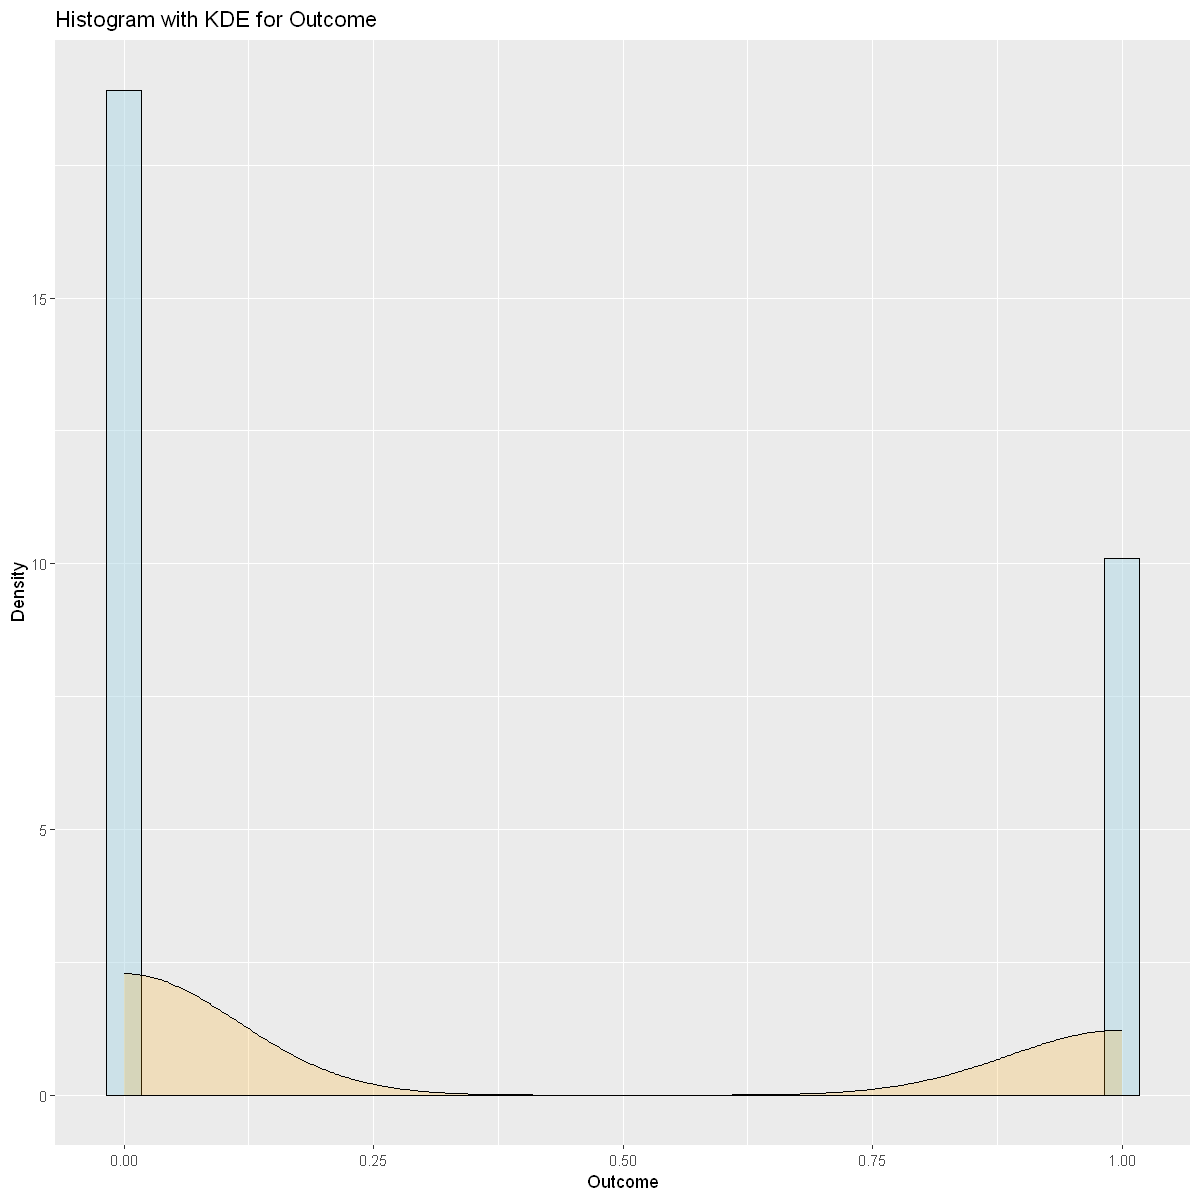

In [ ]:
for (col in names(cd)) {
    print(
  ggplot(cd, aes(x = !!sym(col))) +
    geom_histogram(aes(y = after_stat(density)), bins = 30, color = "black", fill = "lightblue", alpha = 0.5) +
    geom_density(alpha = 0.2, fill = "orange") +
    labs(title = paste("Histogram with KDE for", col), x = col, y = "Density")
        )
}

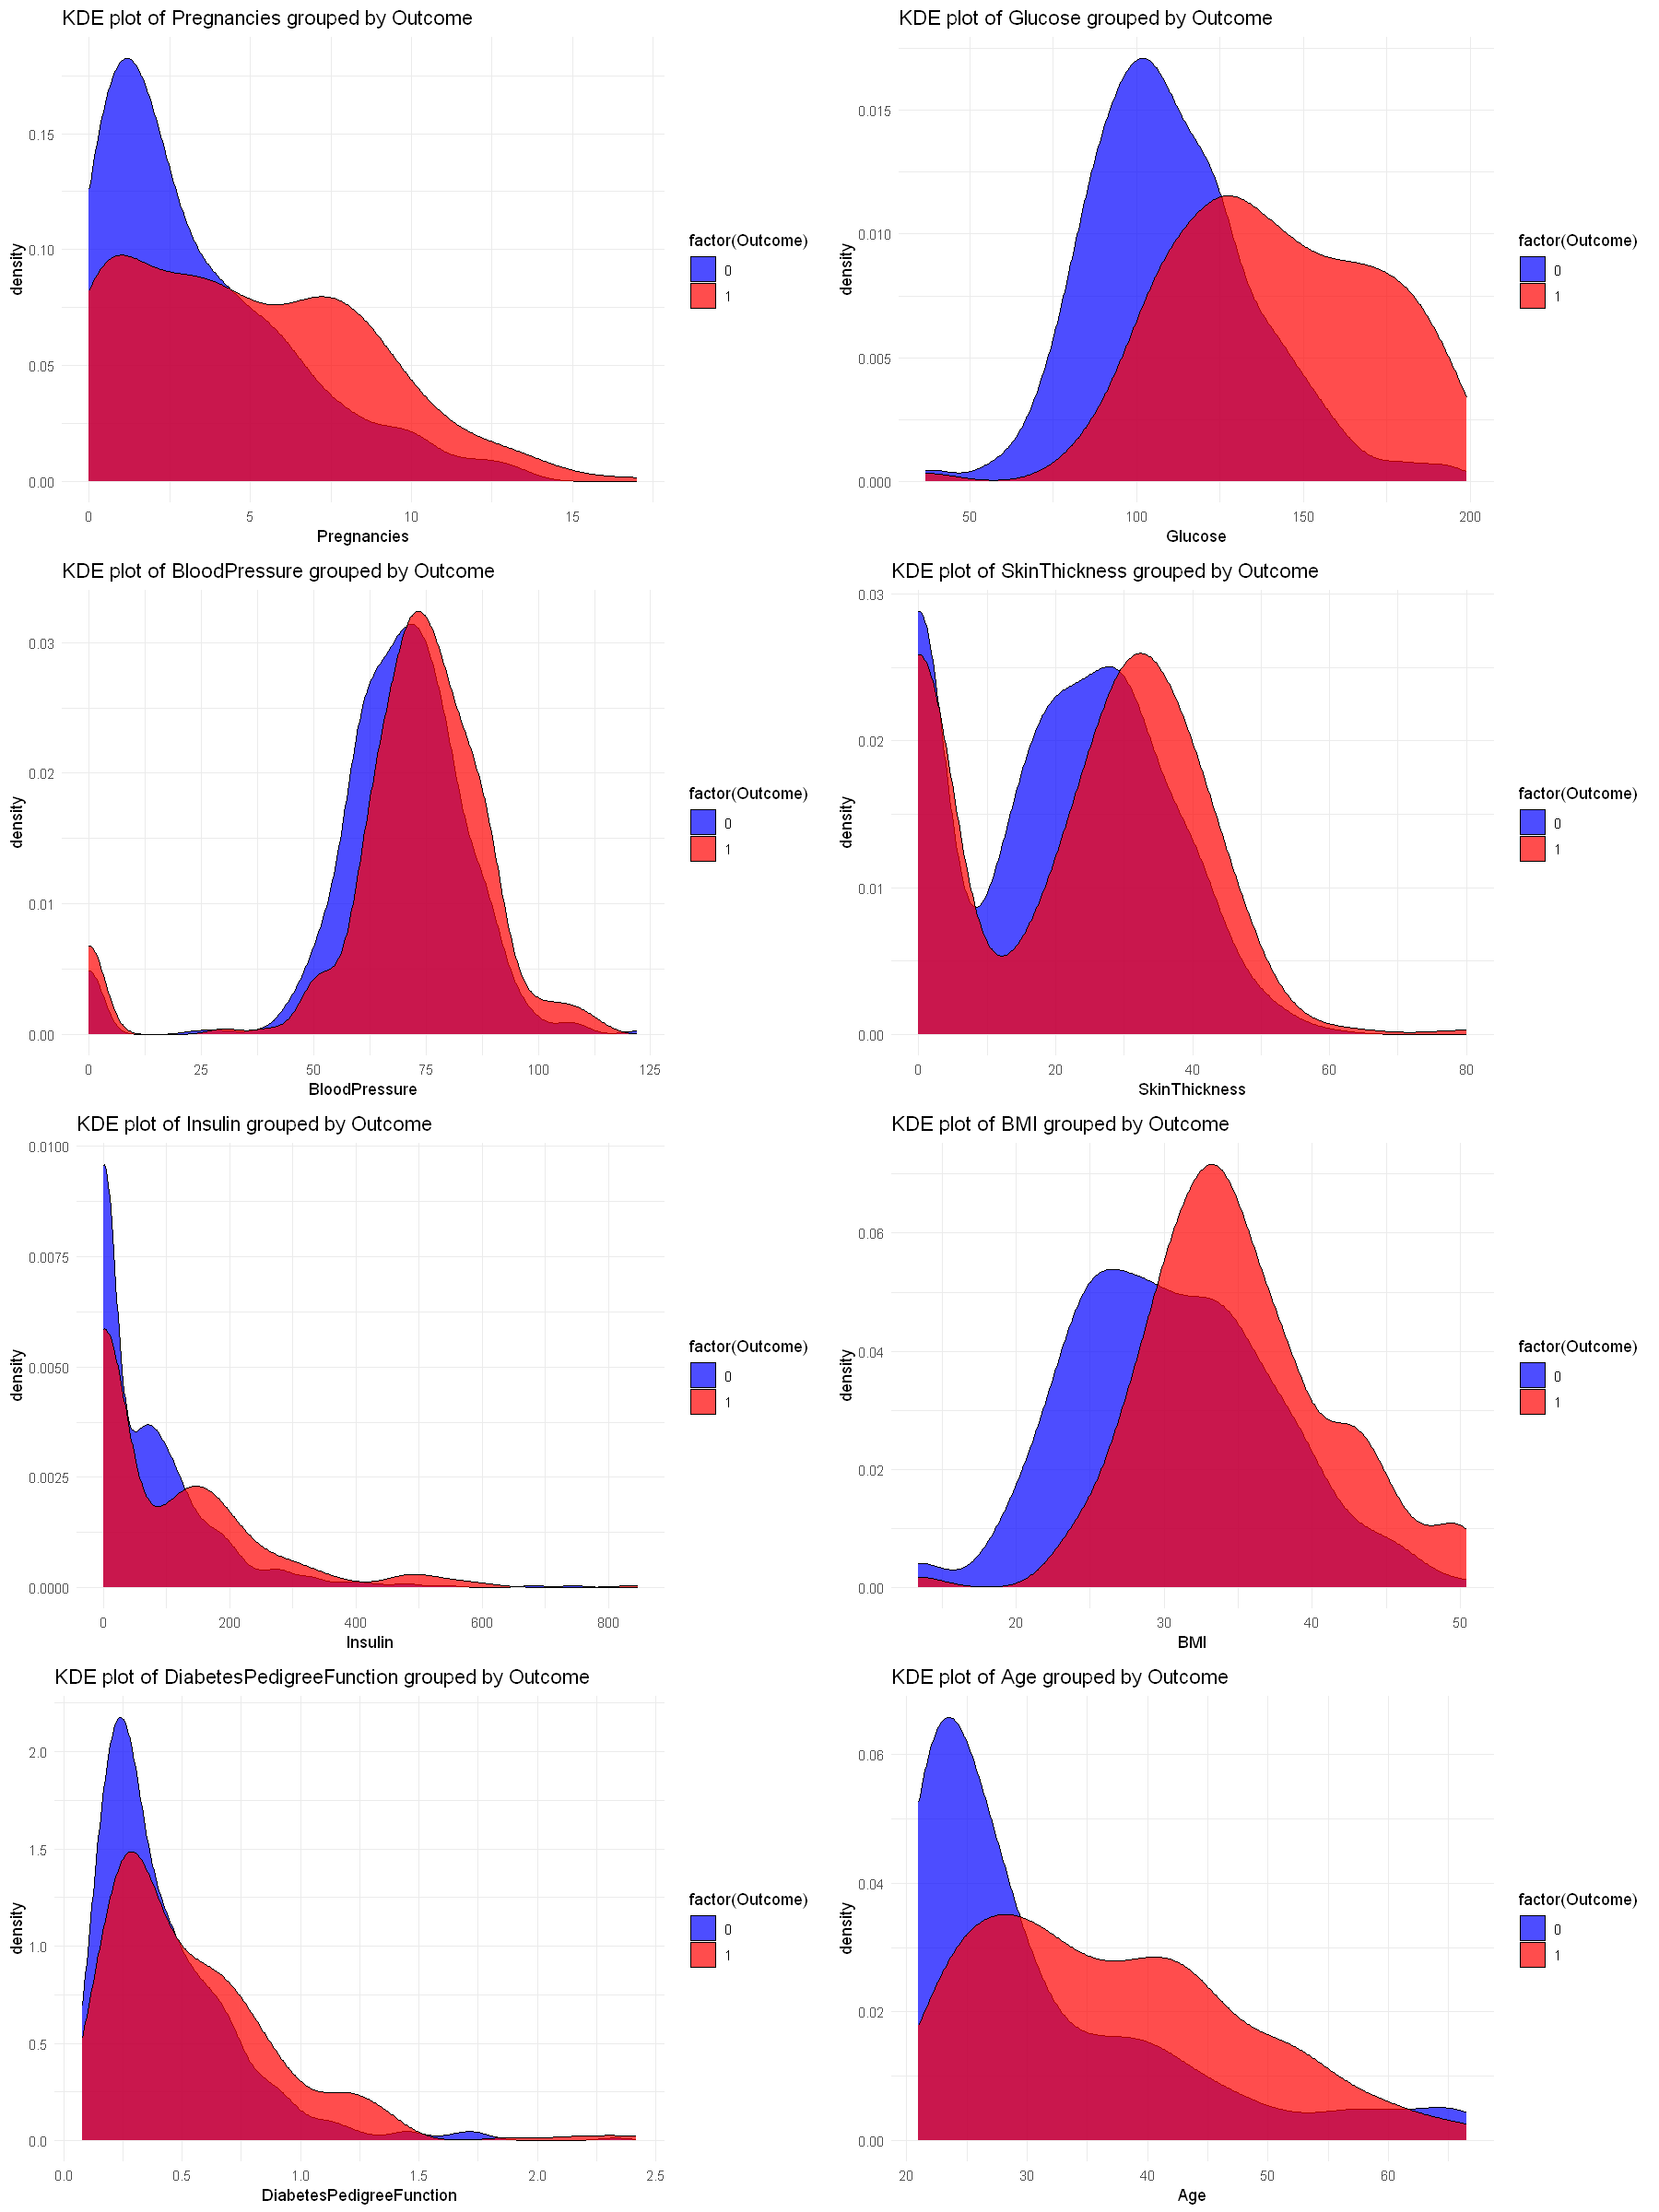

In [ ]:
num_columns <- ncol(cd) - 1
num_rows <- (num_columns + 1) %/% 2

colors <- c("blue", "red")
options(repr.plot.width = 15, repr.plot.height = 5 * num_rows)


plots <- lapply(seq_along(names(cd)[-ncol(cd)]), function(i) {
  ggplot(cd, aes(x = .data[[names(cd)[i]]], fill = factor(Outcome))) +
    geom_density(alpha = 0.7) +
    scale_fill_manual(values = colors) +
    labs(title = paste("KDE plot of", names(cd)[i], "grouped by Outcome")) +
    theme_minimal()
})

gridExtra::grid.arrange(grobs = plots, ncol = 2)


> Observation :
Each features having diabetes has more variation than having no diabetes.

## Handling Imbalanced dataset

In [ ]:
table(cd$Outcome)


  0   1 
500 267 

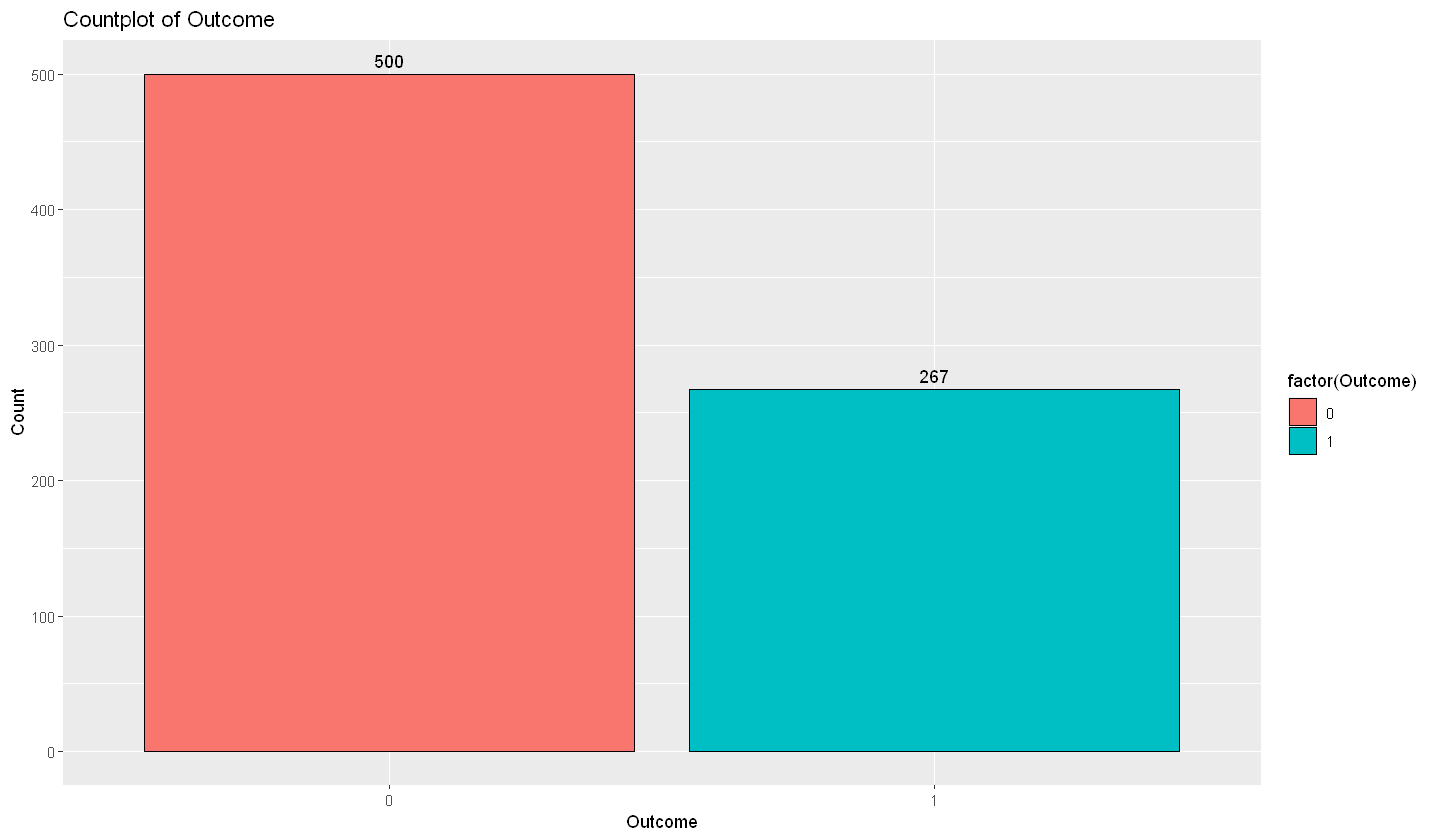

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 7)
outcome_counts <- as.data.frame(table(cd$Outcome))
names(outcome_counts) <- c("Outcome", "Count")

ggplot(outcome_counts, aes(x = factor(Outcome), y = Count, fill = factor(Outcome))) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Countplot of Outcome", x = "Outcome", y = "Count")  +  
  geom_text(aes(label = Count), vjust = -0.5) 


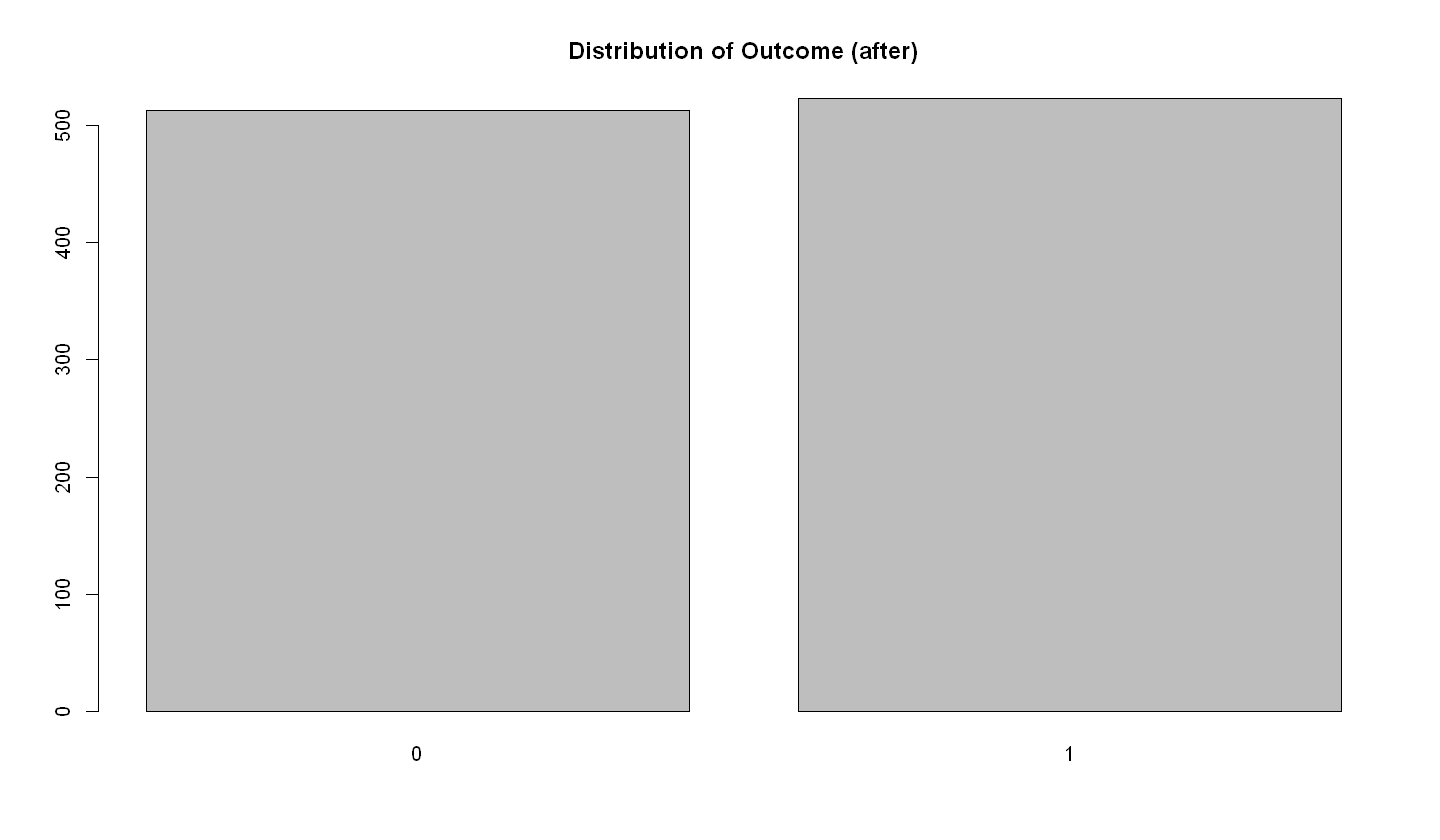

In [ ]:
cd <- ovun.sample(Outcome ~ ., data = cd, method = "over")$data

outcome_table_after <- table(cd$Outcome)
barplot(outcome_table_after,main = "Distribution of Outcome (after)")

# Machine Learning

In [ ]:
colnames(cd)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [ ]:
x <- subset(cd, select = -c(Outcome))
y <- cd$Outcome  


train_index <- createDataPartition(y, p = 0.7, list = FALSE)
X_train <- x[train_index, ]
y_train <- y[train_index]
X_test <- x[-train_index, ]
y_test <- y[-train_index]


In [ ]:
colnames(X_train)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"

In [ ]:
# Define models
models <- list(
  LogisticRegression = glm(y_train ~ ., data = X_train, family = binomial(link = "logit")),
  KNeighborsClassifier = knn(train = X_train, test = X_test, cl = y_train, k = 2),
  RandomForest = randomForest(factor(y_train) ~ ., data = X_train)  # Specify y_train as factor
)

# Initialize lists to store predictions and confusion matrices
predicted <- list()
conf_matrix <- list()

# Loop over models
for (name in names(models)) {
  model <- models[[name]]
  
  if (name == "LogisticRegression") {
    # Make predictions for logistic regression
    predict <- predict(model, newdata = X_test, type = "response") > 0.5
  } else if (name == "KNeighborsClassifier") {
    # Make predictions for kNN
    predict <- knn(train = X_train, test = X_test, cl = y_train, k = 2)
  } else if (name == "RandomForest") {
    # Make predictions for Random Forest
    predict <- predict(model, newdata = X_test)
  }
  
  # Calculate confusion matrix
  cm <- table(y_test, predict)
  
  # Store predictions and confusion matrix
  predicted[[name]] <- predict
  conf_matrix[[name]] <- cm

  # Print accuracy
  acc <- sum(predict == y_test) / length(y_test)
  print(paste(name, "Accuracy:", acc))
  
  # Print confusion matrix
  cat(name, "Confusion Matrix:\n")
  print(cm)
  cat("\n\n")
}


[1] "LogisticRegression Accuracy: 0.790322580645161"
LogisticRegression Confusion Matrix:
      predict
y_test FALSE TRUE
     0   124   31
     1    34  121


[1] "KNeighborsClassifier Accuracy: 0.874193548387097"
KNeighborsClassifier Confusion Matrix:
      predict
y_test   0   1
     0 128  27
     1  12 143


[1] "RandomForest Accuracy: 0.932258064516129"
RandomForest Confusion Matrix:
      predict
y_test   0   1
     0 142  13
     1   8 147




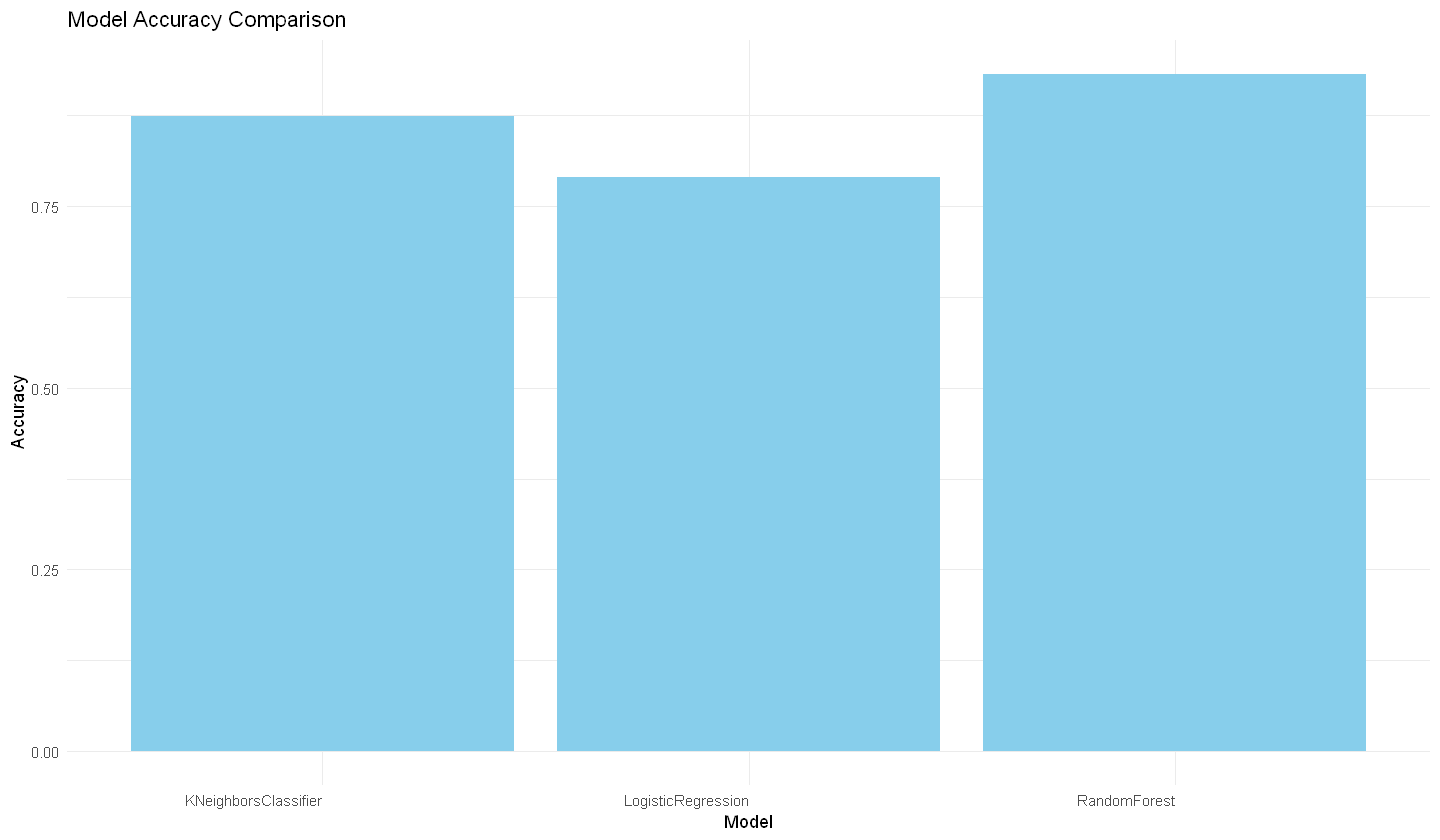

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 7)
accuracies <- sapply(predicted, function(pred) sum(pred == y_test) / length(y_test))
accuracy_df <- data.frame(Model = names(models), Accuracy = accuracies)

# Plot bar chart
ggplot(accuracy_df, aes(x = Model, y = Accuracy)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Model Accuracy Comparison",
       x = "Model",
       y = "Accuracy") +
  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 1))

#### RandomForest has achieved highes accuracy of 93%.